## ***Capstone Project : Heathcare***

***Problem Statement:***

---


We all know that Health care is very important domain in the market. It is directly linked with the life of the individual; hence we have to be always be proactive in this particular domain. Money plays a major role in this domain, because sometime treatment becomes super costly and if any individual is not covered under the insurance then it will become a pretty tough financial situation for that individual. The companies in the medical insurance also want to reduce their risk by optimizing the insurance cost, because we all know a healthy body is in the hand of the individual only. If individual eat healthy and do proper exercise the chance of getting ill is drastically reduced.


***Need for the Study/Project :***

---


Rising healthcare costs make it essential to tailor insurance premiums to individual risk profiles. A one-size-fits-all approach is inadequate; personalized pricing based on health and lifestyle data can help make insurance more affordable and fair. This study aims to create a predictive model to optimize insurance costs, benefiting both insurers and policyholders by aligning premiums with individual health risks.

***Understanding Business/Social Opportunity***

---



This study presents a significant business opportunity for insurance companies to enhance profitability by accurately pricing premiums based on individual health data. Personalized insurance costs can attract more customers, reduce claim risks, and promote healthier lifestyles through incentives, resulting in lower medical expenses.

From a social perspective, the model fosters fairness in insurance pricing, making healthcare more accessible and affordable. It also encourages individuals to adopt healthier habits, benefiting both their well-being and financial security.

***Understanding How Data Was Collected in Terms of Time, Frequency, and Methodology***


---


The dataset consists of customer health and lifestyle information collected at the time of applying for insurance. Data related to factors such as cholesterol levels, BMI, daily steps, and medical history were likely obtained through a combination of self-reported questionnaires, medical check-ups, and previous insurance records. Regular health check-ups and doctor visits are also recorded based on the customer’s recent medical history. The data collection likely occurs on an annual basis or when customers renew or apply for new insurance policies, ensuring that it reflects their current health status.

***Visual inspection of data & Understanding of attributes***

---



In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the data from the CSV file

file_path = '/content/drive/MyDrive/Capstone Project/Health Care Project/Data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


***First few rows of the dataset for inspection***

---



In [ ]:
print("First few rows of the dataset:")
pd.set_option('display.max_columns', None)
df.head()

First few rows of the dataset:


,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


***Number of rows and columns***

---



In [ ]:
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 25000 rows and 24 columns.


***Summary of the data (column names, data types, and non-null counts)***

---



In [ ]:
print("\nData Summary:")
print(df.info())


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level

***Dropping Irrelevant Variables***

---



In [ ]:
# Drop the 'applicant_id' column as it's unique and insignificant
df.drop(columns=['applicant_id'], inplace=True)

***Renaming column Names***

---



In [ ]:
# Rename the column 'regular_checkup_last_year'
df.rename(columns={'regular_checkup_lasy_year': 'regular_checkup_last_year'}, inplace=True)

# Rename all columns with the first letter capitalized
df.columns = [col.capitalize() for col in df.columns]


***Handling Missing Values***

---

**BMI :** To handle the missing values in the bmi column, which constituted approximately 3.96% of the data, we imputed these missing values using KNN imputation menthod. This method helps to fill the gaps in a way that minimally affects the overall distribution of the data. Following this imputation, the dataset no longer has missing values in the bmi column.

***Year_last_admitted :*** Given that approximately 47.52% of the Year_last_admitted data is missing, it is reasonable to drop this column from the dataset.

In [ ]:
from sklearn.impute import KNNImputer

features_for_imputation = df[['Bmi', 'Age', 'Weight', 'Daily_avg_steps','Fat_percentage',
                              'Weight_change_in_last_one_year',  'Avg_glucose_level']]
# Added relevant columns here for accurate imputation

# Initializing the KNNImputer with the number of neighbors, e.g., k=5
imputer = KNNImputer(n_neighbors=5)

# KNN imputation
imputed_data = imputer.fit_transform(features_for_imputation)

# Converting the result back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=features_for_imputation.columns)

# Update the original DataFrame with the imputed 'BMI' column
df['Bmi'] = imputed_df['Bmi']

# Check for missing values after imputation (should be 0)
print(df['Bmi'].isnull().sum())

0


In [ ]:
# Drop the 'Year_last_admitted' column
df.drop(columns=['Year_last_admitted'], inplace=True)

***Correcting Datatype***

---



In [ ]:
# Convert specified columns to categorical type
df['Adventure_sports'] = df['Adventure_sports'].astype('object')
df['Heart_decs_history'] = df['Heart_decs_history'].astype('object')
df['Other_major_decs_history'] = df['Other_major_decs_history'].astype('object')

# Verify the conversion
print(df.dtypes)


Years_of_insurance_with_us          int64
Regular_checkup_last_year           int64
Adventure_sports                   object
Occupation                         object
Visited_doctor_last_1_year          int64
Cholesterol_level                  object
Daily_avg_steps                     int64
Age                                 int64
Heart_decs_history                 object
Other_major_decs_history           object
Gender                             object
Avg_glucose_level                   int64
Bmi                               float64
Smoking_status                     object
Location                           object
Weight                              int64
Covered_by_any_other_company       object
Alcohol                            object
Exercise                           object
Weight_change_in_last_one_year      int64
Fat_percentage                      int64
Insurance_cost                      int64
dtype: object


***Descriptive statistics for continuous variables***

---



In [ ]:
print("\nDescriptive Statistics for Continuous Variables:")
pd.options.display.float_format = '{:.2f}'.format
df.describe()


Descriptive Statistics for Continuous Variables:


,Years_of_insurance_with_us,Regular_checkup_last_year,Visited_doctor_last_1_year,Daily_avg_steps,Age,Avg_glucose_level,Bmi,Weight,Weight_change_in_last_one_year,Fat_percentage,Insurance_cost
count,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00
mean,4.09,0.77,3.10,5215.89,44.92,167.53,31.39,71.61,2.52,28.81,27147.41
std,2.61,1.20,1.14,1053.18,16.11,62.73,7.75,9.33,1.69,8.63,14323.69
min,0.00,0.00,0.00,2034.00,16.00,57.00,12.30,52.00,0.00,11.00,2468.00
25%,2.00,0.00,2.00,4543.00,31.00,113.00,26.20,64.00,1.00,21.00,16042.00
50%,4.00,0.00,3.00,5089.00,45.00,168.00,30.60,72.00,3.00,31.00,27148.00
75%,6.00,1.00,4.00,5730.00,59.00,222.00,35.40,78.00,4.00,36.00,37020.00
max,8.00,5.00,12.00,11255.00,74.00,277.00,100.60,96.00,6.00,42.00,67870.00


***Detailed analysis of the descriptive statistics for each continuous variable in the dataset:***

**2. Years of Insurance with Us** :  **Mean**: 4.09 years | **Range**: From 0 to 8 years.
- **Insight**: Most customers have been insured for a moderate duration, with the mean suggesting a relatively stable customer base. This variable can help assess customer loyalty.

**3. Regular Checkups (Last Year)** : **Mean**: 0.77 checkups | **Range**: From 0 to 5 checkups.
- **Insight**: The low average number of checkups indicates that many customers might not be engaging in regular preventive health care. This could be an area of focus for health promotions.

**4. Visits to Doctor (Last Year)**: **Mean**: 3.10 visits | **Range**: From 0 to 12 visits.
- **Insight**: Customers visit doctors multiple times a year on average. The variability in the number of visits might reflect differing health conditions among the customer base.

**5. Daily Average Steps** : **Mean**: 5215.89 steps | **Range**: From 2034 to 11255 steps.
- **Insight**: The mean suggests a relatively sedentary lifestyle on average. Higher daily steps are generally associated with better health, so this could be a potential target for wellness programs.

**6. Age** : **Mean**: 44.92 years | **Range**: From 16 to 74 years.
- **Insight**: The dataset covers a broad age range, with a mean age suggesting a middle-aged population. Age can significantly impact health risks and insurance costs.

**7. Average Glucose Level**: **Mean**: 167.53 | **Range**: From 57 to 277.
- **Insight**: The glucose level range suggests significant variation in metabolic health among customers. Elevated glucose levels could indicate higher health risks, which may influence insurance costs.

**8. BMI** : **Mean**: 31.39 | **Range**: From 12.30 to 100.60.
- **Insight**: The average BMI falls into the overweight category, suggesting potential health risks. The wide range indicates a diverse customer profile regarding body weight and related health risks.

**9. Weight** :**Mean**: 71.61 kg | **Range**: From 52 to 96 kg.
- **Insight**: The mean weight is within a reasonable range, but the significant variability could impact health risks and insurance costs.

**10. Weight Change (Last Year)** : **Mean**: 2.52 kg | **Range**: From 0 to 6 kg.
- **Insight**: The average weight change is moderate, which could be a factor in assessing health changes and potential insurance costs.

**11. Fat Percentage** :**Mean**: 28.81% | **Range**: From 11% to 42%.
- **Insight**: The fat percentage range indicates varying levels of body fat, which can be related to health risks and insurance costs. Higher fat percentages could be associated with higher health risks.

**12. Insurance Cost** : **Mean**: 27,147.41 | **Range**: From 2,468 to 67,870.
- **Insight**: The wide range in insurance costs reflects varying levels of risk and coverage among customers. The mean cost provides a benchmark for average insurance expenditure.

**Summary Insights:**
- **Variability**: High variability in key health indicators (e.g., BMI, weight, average glucose level) suggests a diverse customer base with varying health profiles.
- **Health Risks**: Variables like average glucose level, BMI, and fat percentage highlight potential health risks that could influence insurance costs.
- **Opportunities**: There may be opportunities for targeted health programs or interventions based on the data, such as improving regular checkups and increasing physical activity.

***Distribution of categorical variables***

---



In [ ]:
print("\nDistribution of Categorical Variables:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    value_counts = df[col].value_counts(normalize=True) * 100
    formatted_counts = value_counts.map(lambda x: f"{x:.2f}%")
    print(formatted_counts)



Distribution of Categorical Variables:

Value counts for Adventure_sports:
Adventure_sports
0    91.83%
1     8.17%
Name: proportion, dtype: object

Value counts for Occupation:
Occupation
Student     40.68%
Business    40.08%
Salried     19.24%
Name: proportion, dtype: object

Value counts for Cholesterol_level:
Cholesterol_level
150 to 175    35.05%
125 to 150    33.36%
200 to 225    11.85%
175 to 200    11.52%
225 to 250     8.22%
Name: proportion, dtype: object

Value counts for Heart_decs_history:
Heart_decs_history
0    94.54%
1     5.46%
Name: proportion, dtype: object

Value counts for Other_major_decs_history:
Other_major_decs_history
0    90.18%
1     9.82%
Name: proportion, dtype: object

Value counts for Gender:
Gender
Male      65.69%
Female    34.31%
Name: proportion, dtype: object

Value counts for Smoking_status:
Smoking_status
never smoked       37.00%
Unknown            30.22%
formerly smoked    17.32%
smokes             15.47%
Name: proportion, dtype: object

Value 

***Detailed analysis of the descriptive statistics for each Categorical variable in your dataset:***

The categorical variables in the dataset show diverse distributions. Most participants do not engage in adventure sports (92.19%) and have no history of heart disease (94.46%). The occupation distribution is almost evenly split between students and business professionals. Cholesterol levels are predominantly in the 150 to 175 range, while a significant portion of the data reveals no major disease history. Gender distribution is skewed towards males (65.69%). Smoking status is varied, with a considerable percentage of unknown status. Locations are spread across various cities, with Bangalore having the highest representation. A majority of individuals are not covered by any other insurance (69.67%). Alcohol consumption is most commonly rare, and exercise habits show a preference for moderate exercise.

***Categorizing the cities into Southwest, Southeast, Northwest, and Northeast based on their geographical positions in India***

---



In [ ]:
# Define a dictionary to map cities to the new regions
location_to_region = {
    'Bangalore': 'Southwest',
    'Jaipur': 'Northwest',
    'Bhubaneswar': 'Southeast',
    'Mangalore': 'Southeast',
    'Delhi': 'Northwest',
    'Ahmedabad': 'Southwest',
    'Guwahati': 'Northeast',
    'Chennai': 'Southeast',
    'Kanpur': 'Northwest',
    'Nagpur': 'Southwest',
    'Mumbai': 'Southwest',
    'Lucknow': 'Northwest',
    'Pune': 'Southwest',
    'Kolkata': 'Northeast',
    'Surat': 'Southwest'
}

# Map the 'Location' column to the new regions
df['Region'] = df['Location'].map(location_to_region)

# Display the updated DataFrame with the new 'Region' column
print(df[['Location', 'Region']].head())

    Location     Region
0    Chennai  Southeast
1     Jaipur  Northwest
2     Jaipur  Northwest
3    Chennai  Southeast
4  Bangalore  Southwest


In [ ]:

# Dropping Location from DataFrame
df = df.drop(columns=['Location'])


***Correcting the spelling Mistake***

---



In [ ]:
df['Occupation'] = df['Occupation'].replace('Salried', 'Salaried')

# Verify the changes
print(df['Occupation'].value_counts())


Occupation
Student     10169
Business    10020
Salaried     4811
Name: count, dtype: int64


***Exploratory data analysis : Univariate analysis of Numerical Variable***

---



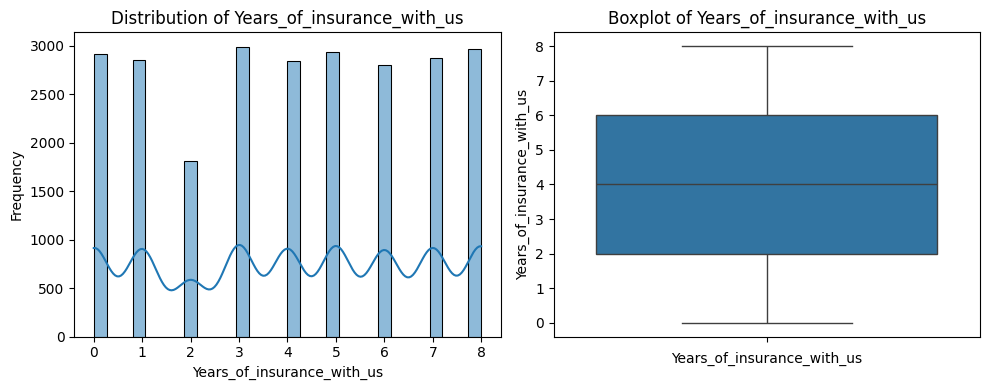

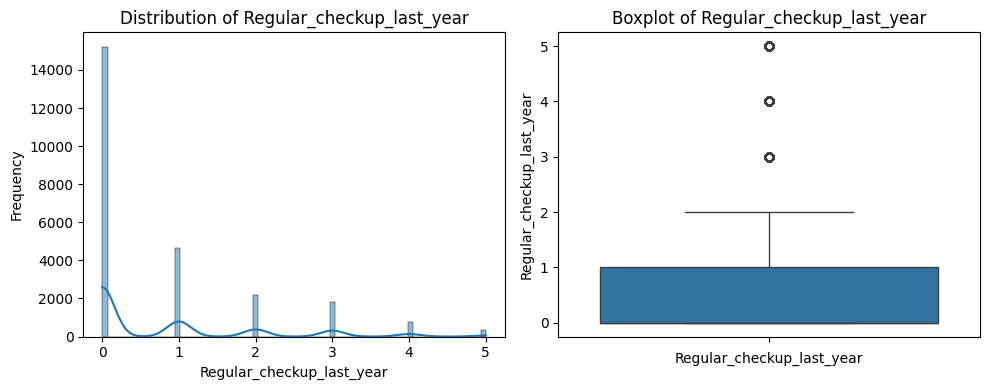

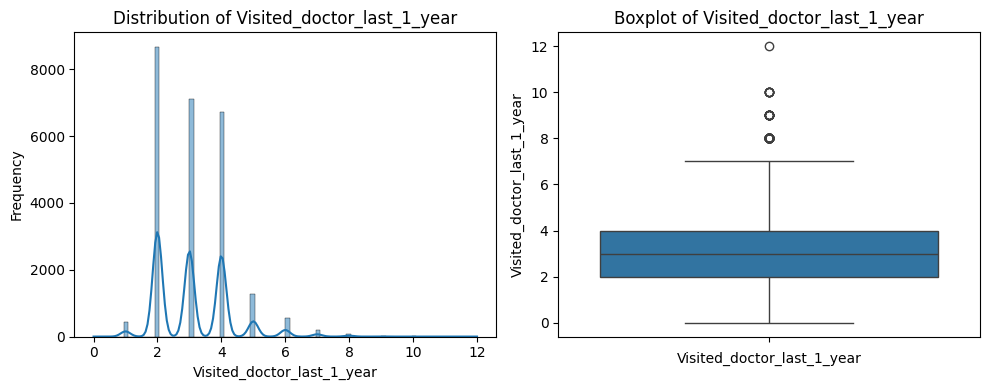

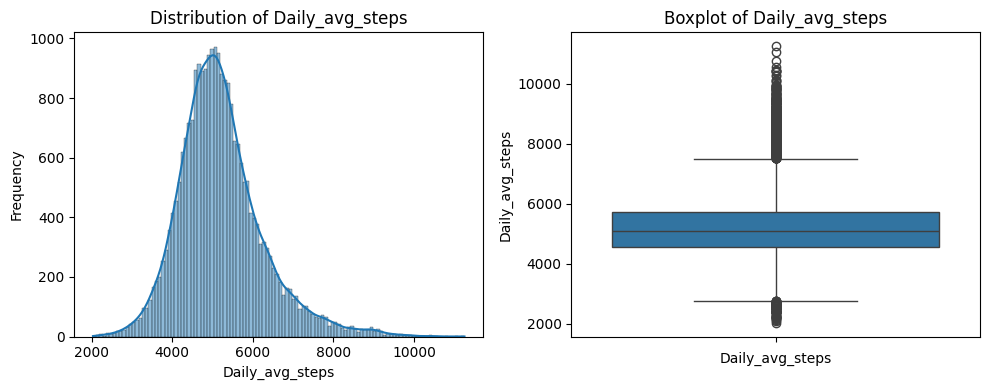

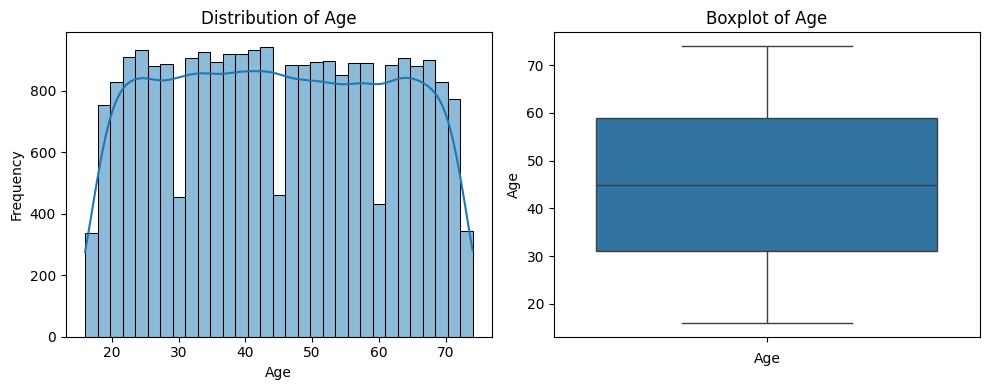

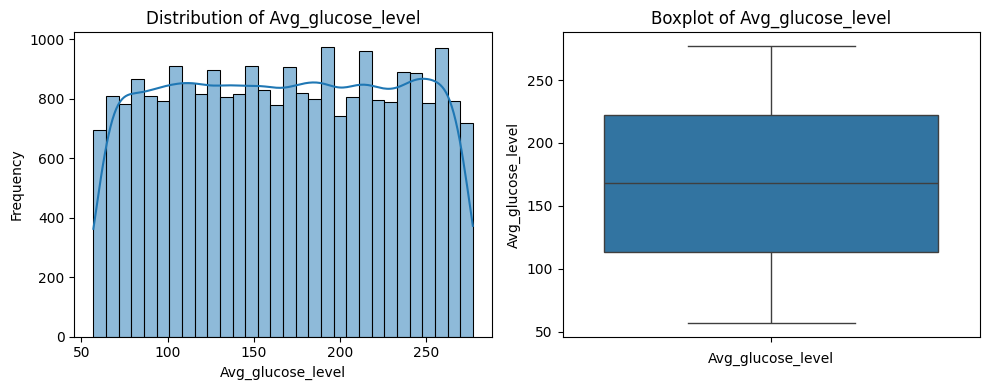

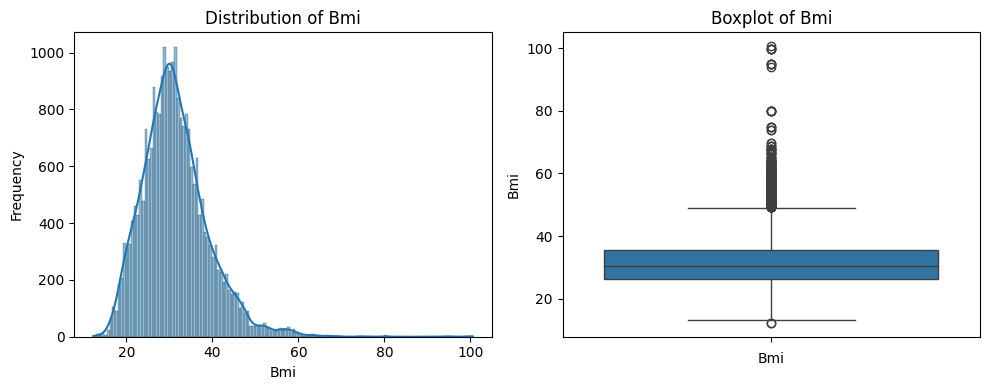

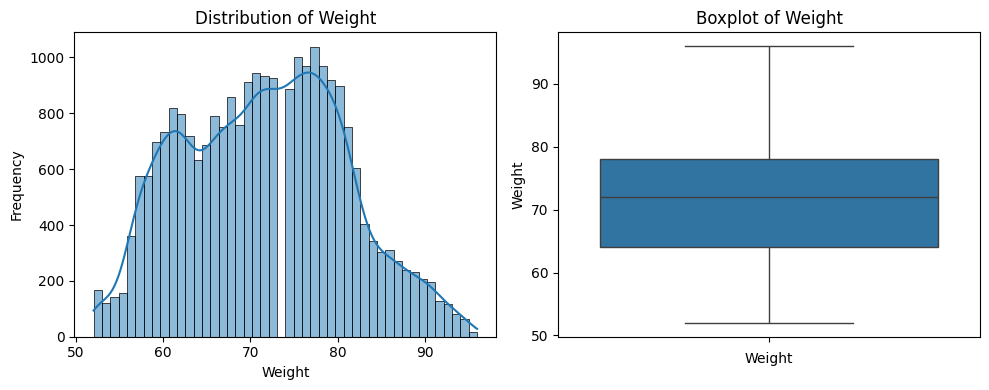

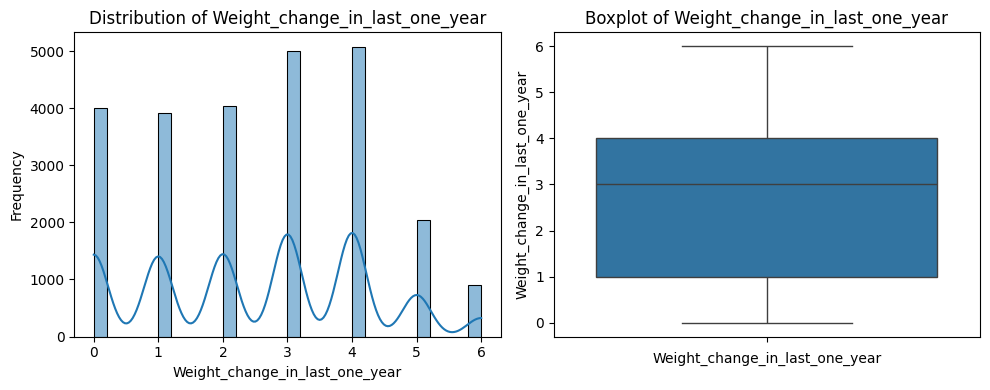

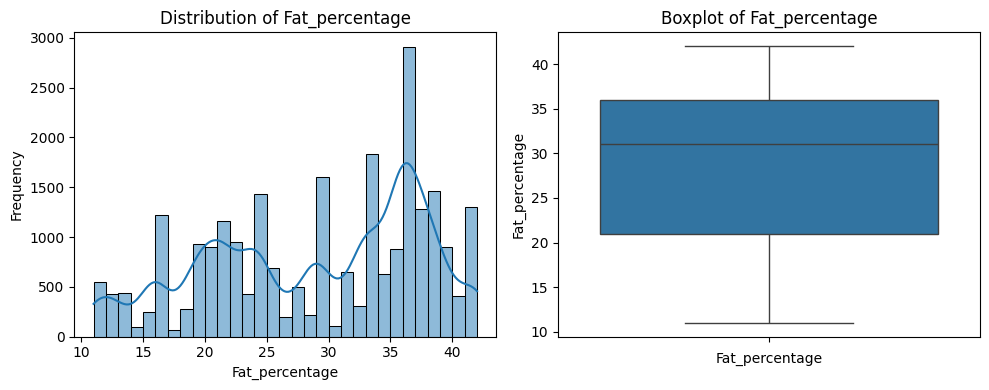

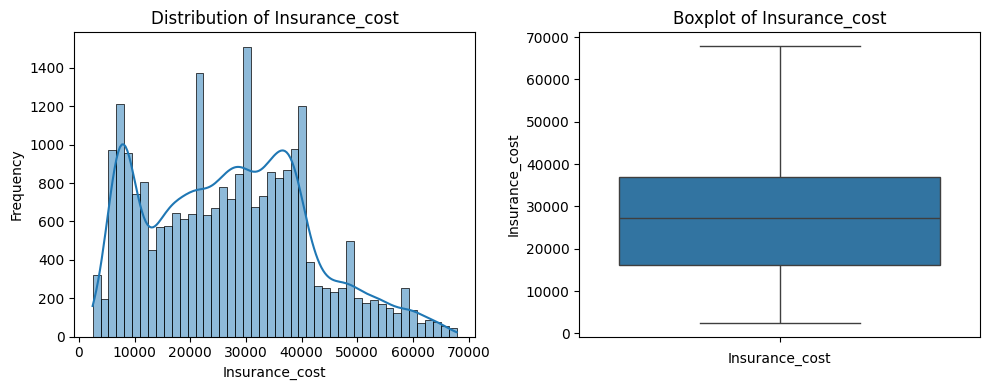

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in continuous_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()



---

***Distribution of Regular_checkup_last_year***

---


**Checkup Count:** The X-axis shows the number of checkups customers had in the last year, ranging from 0 to 5.

**Spike at Zero:** A majority of customers (spike at 0 checkups) did not attend a regular checkup last year.

**Usage Pattern:** A small portion of customers had 1 or 2 checkups, with almost negligible numbers having more than 3.

**Low Engagement:**The overall low frequency of checkups points to a potential underutilization of available checkup services by customers.

**Outliers:** There are a few outliers, where some customers had 3 or more checkups, but they are rare.

---

***Distribution of Weight_change_in_last_one_year***

---

**Years of Insurance:** The X-axis represents the number of years customers have been with the insurance company, ranging from 0 to 8 years.

**Customer Distribution:** The graph shows that a large portion of customers have stayed with the company for an even number of years, with peaks at 0, 2, 4, and 6 years.

**Pattern:** There is a pattern indicating that customers are more likely to remain with the company for periods of 2 years, possibly due to renewal cycles every two years.

**Retention:** There is a significant drop after 1 year, indicating a potential challenge with customer retention within the first year.

**No Outliers:** There are no visible outliers, indicating a consistent retention pattern.


---


***Distribution of Daily Average Steps***

---

**Histogram:** This graph shows the distribution of daily average steps.

**Daily Steps:** The X-axis represents the number of steps, ranging from about 2,000 to 10,000 steps.

**Normal Distribution:** The distribution is bell-shaped, suggesting a normal distribution centered around 5,000 to 6,000 steps. Most individuals average between 4,000 and 7,000 steps per day.

**Whiskers and Outliers:** The whiskers extend from approximately 3,500 to 7,500 steps, capturing most of the data. Numerous outliers are visible above the top whisker, indicating that some individuals average significantly more than 8,000 steps per day.

---


**Distribution of Doctor Visits in the Last Year**

---

**Histogram:** This graph shows the distribution of how often people visited a doctor in the last year.

**Doctor Visits:** The X-axis represents the number of doctor visits, ranging from 0 to 12.

**Peaks:** There are clear peaks at 1, 2, and 4 visits, indicating these are the most common frequencies.

**Skewed Distribution:** The data is heavily skewed to the left, meaning most individuals visited the doctor fewer times (between 0 and 5), with very few people visiting more than 6 times.

**Whiskers and Outliers:** The whiskers show the range of non-outlier data, extending from 0 to 5. Several outliers are present above the whiskers, with some individuals visiting the doctor more than 6 times in the past year.


---

***Distribution of Avg Glucose Level***

---

**Histogram:** This graph shows the distribution of average glucose levels across individuals.

**Avg Glucose Level:** The X-axis represents glucose levels, ranging from 50 to over 250. The distribution is relatively flat, meaning there is a wide and somewhat uniform spread of glucose levels across individuals.

**Range:** The majority of individuals have glucose levels between 80 and 250, with a peak around 100 to 150 and a slight tapering off at both extremes.

**Avg Glucose Level Distribution:** The glucose level data is fairly evenly distributed, with the majority of individuals having glucose levels between 80 and 250. There are no significant outliers, and the median glucose level is around 140.

---

***Distribution of Age***

---
**Histogram:** This graph shows the distribution of age in the dataset. The age values range from around 20 to 75.

**Age Range:** The X-axis represents age in years. The distribution appears fairly uniform from age 20 to about 70, with a slight drop-off in the number of individuals after age 70.

**Uniform Distribution:** The distribution is close to uniform, meaning individuals across different age groups are relatively evenly distributed, with only minor dips between certain age ranges.

**Spread:** The middle 50% of the data lies between ages 35 and 60, suggesting a concentration of individuals within this range.


---

***Distribution of Weight***

---

**Histogram:** Shows the distribution of weight, with most values falling between 60 and 90 kg.

**Weight Range:** The X-axis shows the weight in kilograms. The distribution appears relatively normal with peaks around 70-75 kg, meaning this is a common weight range for many individuals in the dataset.

**Bimodal Distribution:** There are two distinct peaks, indicating that there may be two subgroups within the population with different weight characteristics.

**Weight Distribution:** More normally distributed, with a central tendency around 70-75 kg, without significant outliers.

---

***Distribution of BMI***

---

**Histogram:** Shows the distribution of BMI in the data set. Most values fall between 20 and 50.

**BMI Range:** The X-axis represents BMI values. There is a noticeable peak around 30-35, showing that many individuals in the dataset have BMIs within that range.

**Right Skew:**  The right tail extends to very high BMI values, indicating a small number of individuals with extremely high BMIs (over 50), suggesting obesity or severe obesity, which is a potential health concern.

**Outliers:** Several dots above the box represent outliers, indicating there are extreme BMI values higher than typical ranges.


---

***Distribution of Weight_change_in_last_one_year***

---

**Histogram:** The highest frequencies are observed for the values 3 and 4, indicating that most individuals experienced a weight change of around 3 to 4 units in the last year.

**Distribution:** The distribution is almost uniform for values from 0 to 4, but there is a notable decrease in frequencies beyond 5, indicating fewer occurrences of larger weight changes.

**KDE (Kernel Density Estimate):** The KDE line shows periodic peaks, corresponding to the integer values in the data. This might be due to the fact that weight change was recorded in integer increments, leading to a "step-like" distribution.

The absence of outliers suggests that extreme weight changes (either very low or very high) were uncommon or not present in the dataset.


---

***Distribution of Fat_percentage***

---
**Histogram:** The bars represent the frequency of different fat percentage values, showing a bimodal distribution (two peaks).

**Multiple Peaks:** The distribution has multiple peaks around 20%, 30%, and 35%, indicating that the population is segmented into different groups.

**Kernel Density Estimate (KDE):** The smooth curve shows the continuous distribution of fat percentages. The bimodal nature of the data is clearly visible, suggesting that there might be two distinct groups or types of products/policies with different fat percentages.

The highest concentration is in the 35-40% range, implying that most data points cluster in higher fat percentages.
The dip around 25-30% indicates a lower frequency of occurrences in that range.


---

***Distribution of Insurance_cost***

---

**Histogram:** The bar heights represent the frequency of different insurance cost values within specific ranges. The costs are spread widely, with most data points falling between 10,000 and 50,000.
There are notable peaks around 10,000, 20,000, 30,000, and 40,000, suggesting that certain price points may be more common, perhaps due to pricing strategies or policy categories.

**Skewed Distribution:** The distribution is right-skewed, meaning that most customers have insurance costs between 10,000 and 40,000, with a tail extending to higher values.

**Peak Around 30,000:** There is a peak around 30,000 and a smaller peak near 40,000, suggesting that a significant number of customers have costs clustered around these values.

**Low Costs:** Very few customers have insurance costs beyond 50,000, highlighting that the bulk of the population has mid-range insurance costs.

**Kernel Density Estimate (KDE)**: The smooth curve overlaid on the histogram shows the distribution of insurance costs as a continuous probability density. The curve suggests the data is positively skewed, with a long tail to the right, indicating that while most insurance costs are lower, there are some higher-cost outliers.

No significant outliers are visible, meaning the cost distribution doesn’t have extreme deviations, though there is a moderate spread.



***Check for Outliers in All Variables:***

---



In [ ]:
import pandas as pd

def check_for_outliers_all(df):
    # Dictionary to store outliers for each column
    outlier_dict = {}

    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define the bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

        # Store the outliers in the dictionary
        outlier_dict[column] = outliers

        # Print summary of outliers for each column
        print(f"Column: {column}")
        print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
        print(f"Number of outliers: {outliers.count()}")
        print("-" * 40)

    return outlier_dict

# Example usage:
outlier_dict = check_for_outliers_all(df)


Column: Years_of_insurance_with_us
Lower bound: -4.0, Upper bound: 12.0
Number of outliers: 0
----------------------------------------
Column: Regular_checkup_last_year
Lower bound: -1.5, Upper bound: 2.5
Number of outliers: 2943
----------------------------------------
Column: Visited_doctor_last_1_year
Lower bound: -1.0, Upper bound: 7.0
Number of outliers: 96
----------------------------------------
Column: Daily_avg_steps
Lower bound: 2762.5, Upper bound: 7510.5
Number of outliers: 952
----------------------------------------
Column: Age
Lower bound: -11.0, Upper bound: 101.0
Number of outliers: 0
----------------------------------------
Column: Avg_glucose_level
Lower bound: -50.5, Upper bound: 385.5
Number of outliers: 0
----------------------------------------
Column: Bmi
Lower bound: 12.4, Upper bound: 49.199999999999996
Number of outliers: 592
----------------------------------------
Column: Weight
Lower bound: 43.0, Upper bound: 99.0
Number of outliers: 0
--------------------

***Imputing Outlier***

In [ ]:
import pandas as pd
import numpy as np

# Function to detect and impute outliers based on IQR
def impute_outliers_with_median(df):
    # Iterate through each numeric column in the dataframe
    for col in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calculate Interquartile Range (IQR)
        IQR = Q3 - Q1
        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify the outliers
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

        # Impute the outliers with the median of the column
        median_value = df[col].median()
        df.loc[outliers, col] = median_value

        # Print out how many outliers were replaced in this column
        print(f'Column {col}: {outliers.sum()} outliers replaced with median.')

    return df

# Apply the function to your DataFrame
df_cleaned = impute_outliers_with_median(df)

# Display the result
df_cleaned.head()


Column Years_of_insurance_with_us: 0 outliers replaced with median.
Column Regular_checkup_last_year: 2943 outliers replaced with median.
Column Visited_doctor_last_1_year: 96 outliers replaced with median.
Column Daily_avg_steps: 952 outliers replaced with median.
Column Age: 0 outliers replaced with median.
Column Avg_glucose_level: 0 outliers replaced with median.
Column Bmi: 592 outliers replaced with median.
Column Weight: 0 outliers replaced with median.
Column Weight_change_in_last_one_year: 0 outliers replaced with median.
Column Fat_percentage: 0 outliers replaced with median.
Column Insurance_cost: 0 outliers replaced with median.


,Years_of_insurance_with_us,Regular_checkup_last_year,Adventure_sports,Occupation,Visited_doctor_last_1_year,Cholesterol_level,Daily_avg_steps,Age,Heart_decs_history,Other_major_decs_history,Gender,Avg_glucose_level,Bmi,Smoking_status,Weight,Covered_by_any_other_company,Alcohol,Exercise,Weight_change_in_last_one_year,Fat_percentage,Insurance_cost,Region
0,3,1,1,Salaried,2,125 to 150,4866,28,1,0,Male,97,31.20,Unknown,67,N,Rare,Moderate,1,25,20978,Southeast
1,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.20,formerly smoked,58,N,Rare,Moderate,3,27,6170,Northwest
2,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.40,formerly smoked,73,N,Daily,Extreme,0,32,28382,Northwest
3,7,0,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.90,Unknown,71,Y,Rare,No,3,37,27148,Southeast
4,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.50,never smoked,74,N,No,Extreme,0,34,29616,Southwest


***Exploratory data analysis : Univariate analysis of Categorical Variable***

---




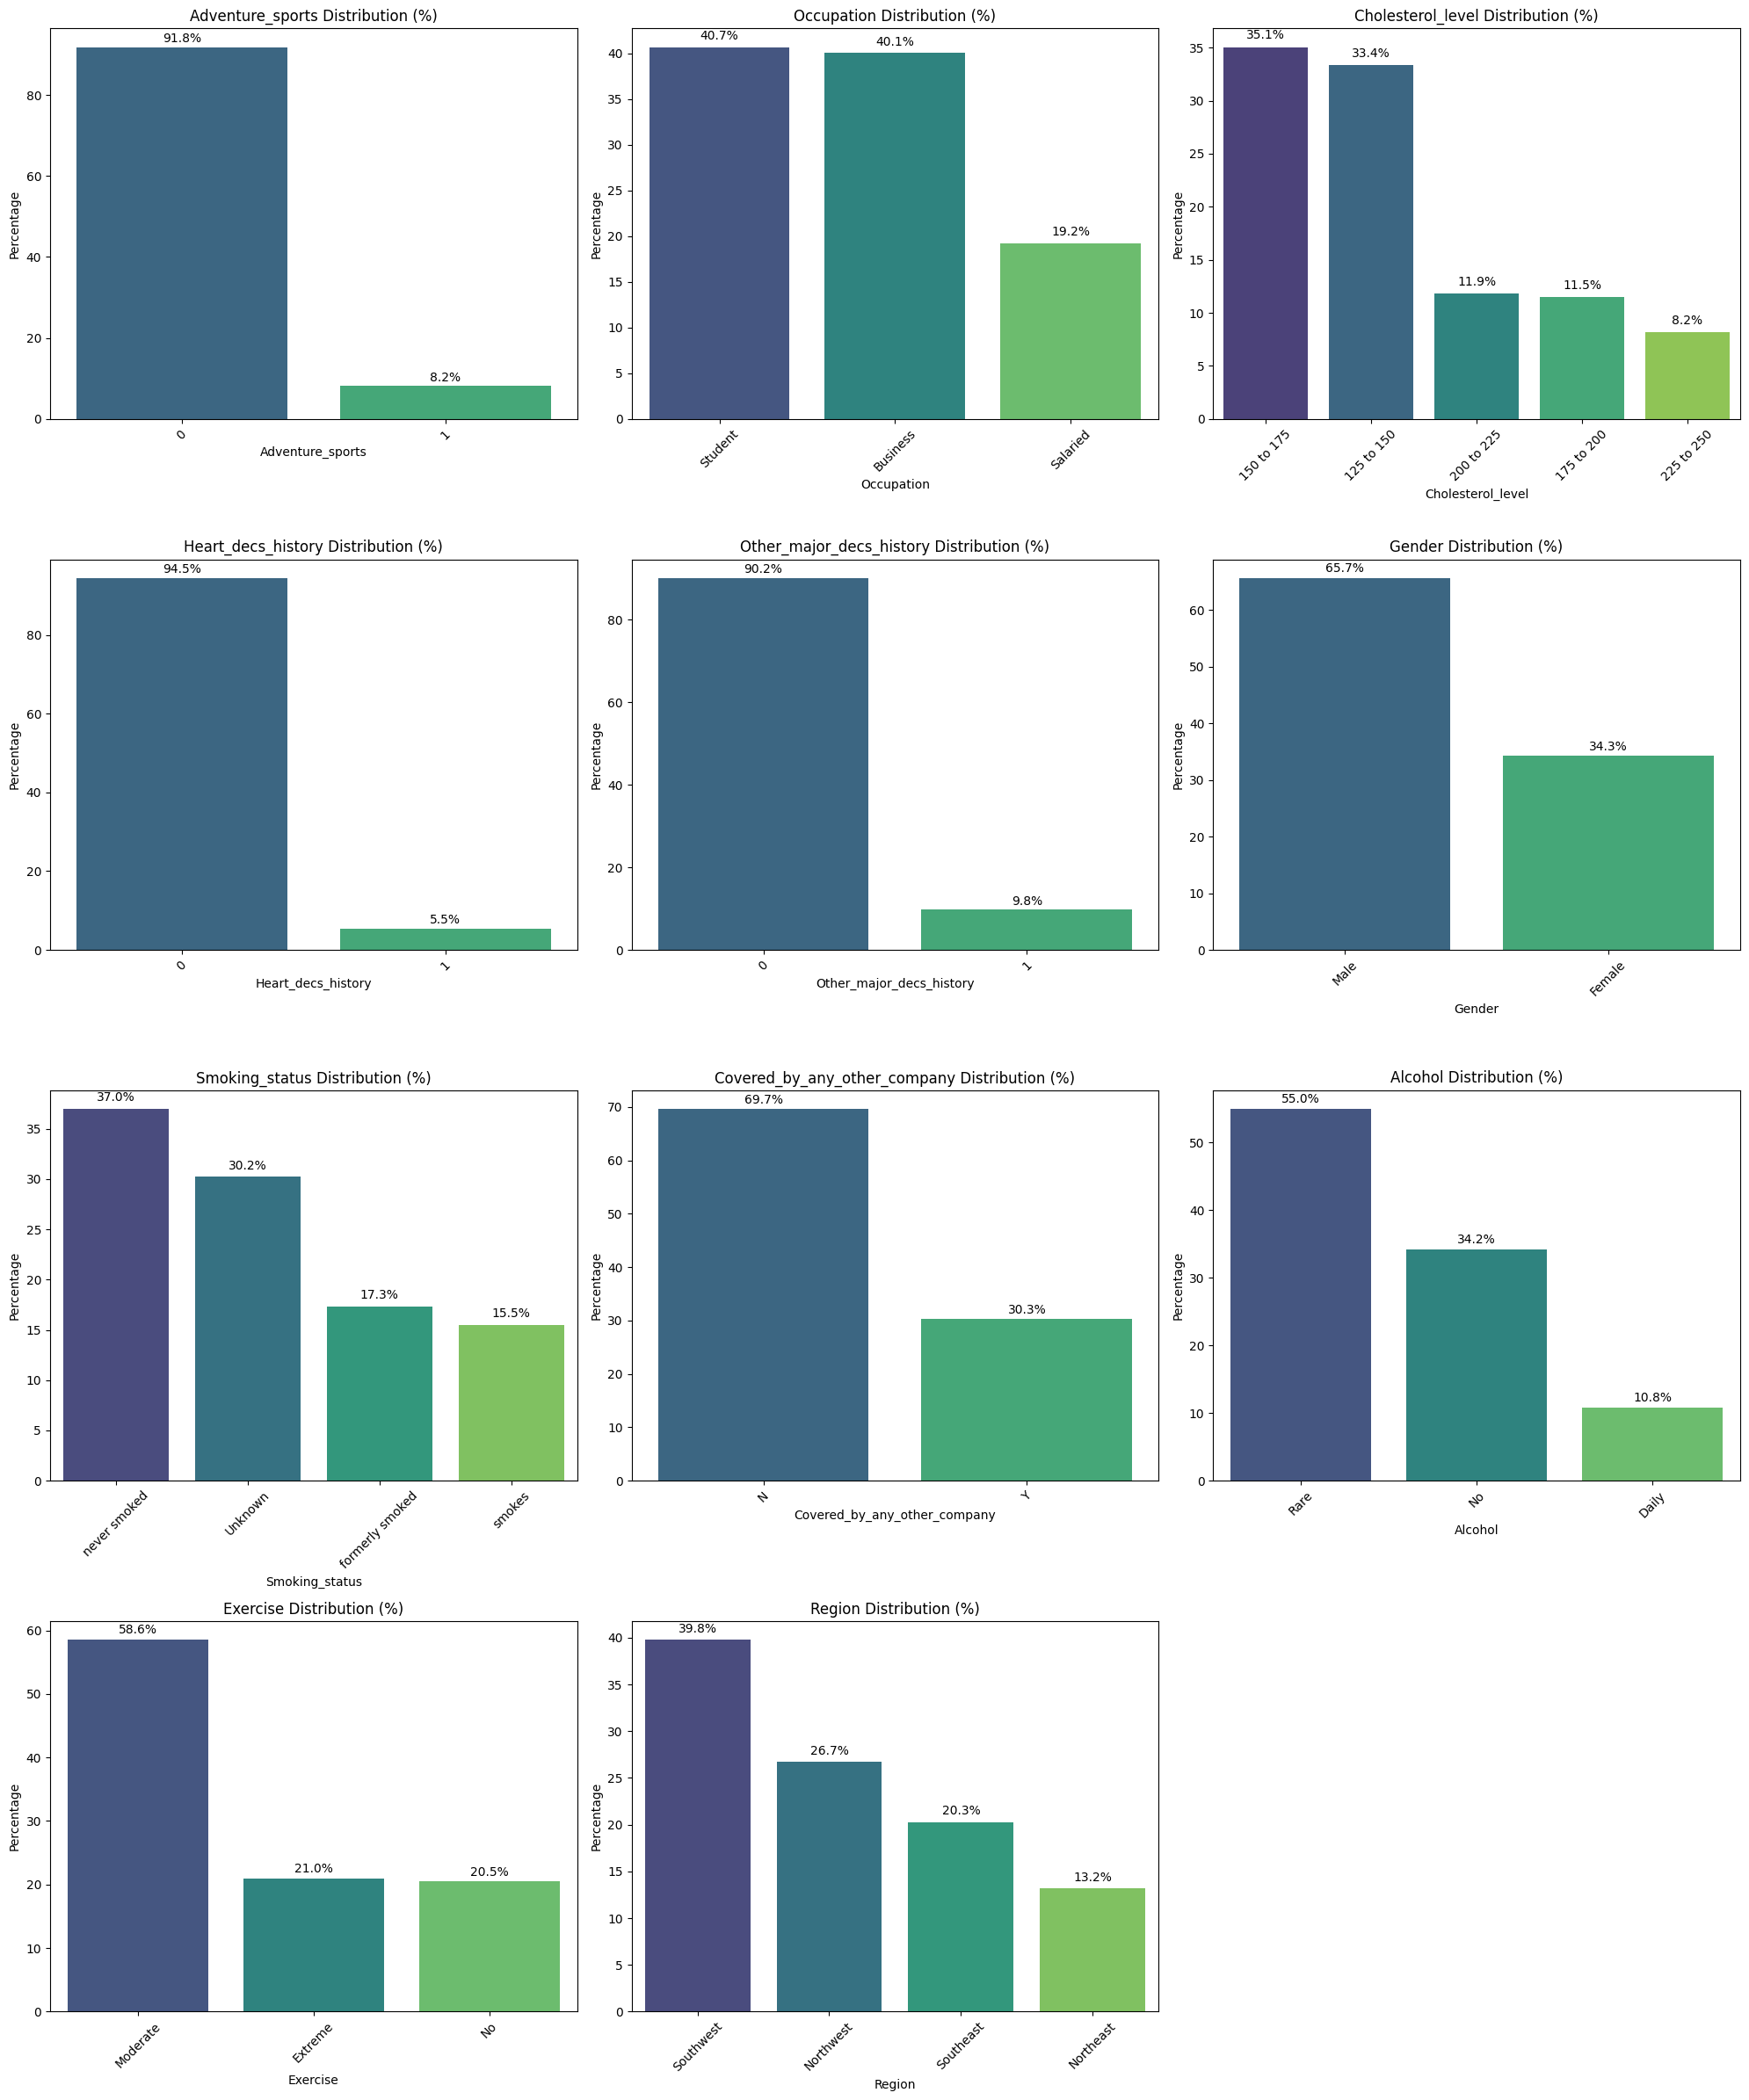

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# List of categorical variables
categorical_vars = [
    'Adventure_sports', 'Occupation', 'Cholesterol_level',
    'Heart_decs_history', 'Other_major_decs_history', 'Gender',
    'Smoking_status', 'Covered_by_any_other_company', 'Alcohol',
    'Exercise', 'Region'
]

# Create subplots with 3 columns
n_vars = len(categorical_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(categorical_vars):
    # Calculate value counts and percentages
    value_counts = df[col].value_counts()
    percentages = 100 * value_counts / len(df)

    # Plot count plot with percentages
    sns.barplot(x=value_counts.index, y=percentages, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{col} Distribution (%)')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

    # Annotate percentages on the bars
    for j, value in enumerate(percentages):
        axes[i].text(j, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


***Insights for each variable chart***

---

1. **Adventure Sports Distribution**
   - **Insight**: The majority (91.8%) of individuals do not participate in adventure sports, with only 8.2% involved.
   - **Interpretation**: This indicates a low prevalence of adventure sports participation in the population.

2. **Occupation Distribution**
   - **Insight**: The largest group falls into the "Business" category (40.1%), followed closely by "Student" (40.7%), with a smaller portion (19.2%) in "Salaried" roles.
   - **Interpretation**: Business and student populations dominate the data set, potentially affecting trends related to lifestyle choices like exercise or smoking.

3. **Cholesterol Level Distribution**
   - **Insight**: The highest percentage (35.1%) of individuals have cholesterol levels in the range of 150-175 mg/dL, while smaller percentages are distributed across higher levels.
   - **Interpretation**: Most people fall into a healthy cholesterol range, with a small fraction at risk due to higher levels.

4. **Heart Disease History Distribution**
   - **Insight**: A significant majority (94.5%) do not have a history of heart disease, while only 5.5% do.
   - **Interpretation**: Heart disease is not common in this sample, but those with heart disease may represent a critical subgroup for targeted interventions.

5. **Other Major Disease History Distribution**
   - **Insight**: 90.2% report no major disease history, with 9.8% having experienced another major disease.
   - **Interpretation**: Like heart disease, major diseases are rare in this group, which could suggest a generally healthy population.

6. **Gender Distribution**
   - **Insight**: The gender distribution is predominantly male (65.7%), with females making up 34.3%.
   - **Interpretation**: The male-to-female ratio is skewed, which may have implications for gender-specific analyses.

7. **Smoking Status Distribution**
   - **Insight**: The largest group is "never smoked" (37%), followed by "Unknown" (30.2%), "formerly smoked" (17.3%), and "smokes" (15.5%).
   - **Interpretation**: A substantial portion of the population has never smoked, but about one-third either currently or formerly smoked, which could have implications for health outcomes.

8. **Covered by Any Other Company Distribution**
   - **Insight**: The majority (69.7%) are not covered by another company, while 30.3% are covered.
   - **Interpretation**: This suggests that most individuals do not have additional insurance or coverage, which could impact their healthcare options.

9. **Alcohol Consumption Distribution**
   - **Insight**: A significant portion of individuals rarely consume alcohol (55%), with 34.2% abstaining and 10.8% drinking daily.
   - **Interpretation**: Alcohol consumption is low overall, though a small group drinks regularly, which may affect health risks.

10. **Exercise Distribution**
   - **Insight**: Most people engage in moderate exercise (58.6%), while fewer people are extreme exercisers (21%) or do not exercise (20.5%).
   - **Interpretation**: Exercise levels are generally good, but there is room for improvement among the non-exercising group.

11. **Region Distribution**
   - **Insight**: The largest proportion of individuals are from the "Southwest" (39.8%), followed by "Southeast" (26.7%) and smaller percentages from other regions.
   - **Interpretation**: The data is skewed towards certain regions, particularly the Southwest, which could influence regional analysis or lifestyle factors.

In summary, the data suggests a population with low participation in adventure sports, generally moderate cholesterol levels, and a significant portion engaged in moderate exercise. The sample is predominantly male, with most individuals having no history of major diseases and a relatively healthy lifestyle regarding smoking and alcohol consumption. However, the gender imbalance and smoking history may warrant deeper analysis for targeted health interventions.

***Bivariate Analysis***

---



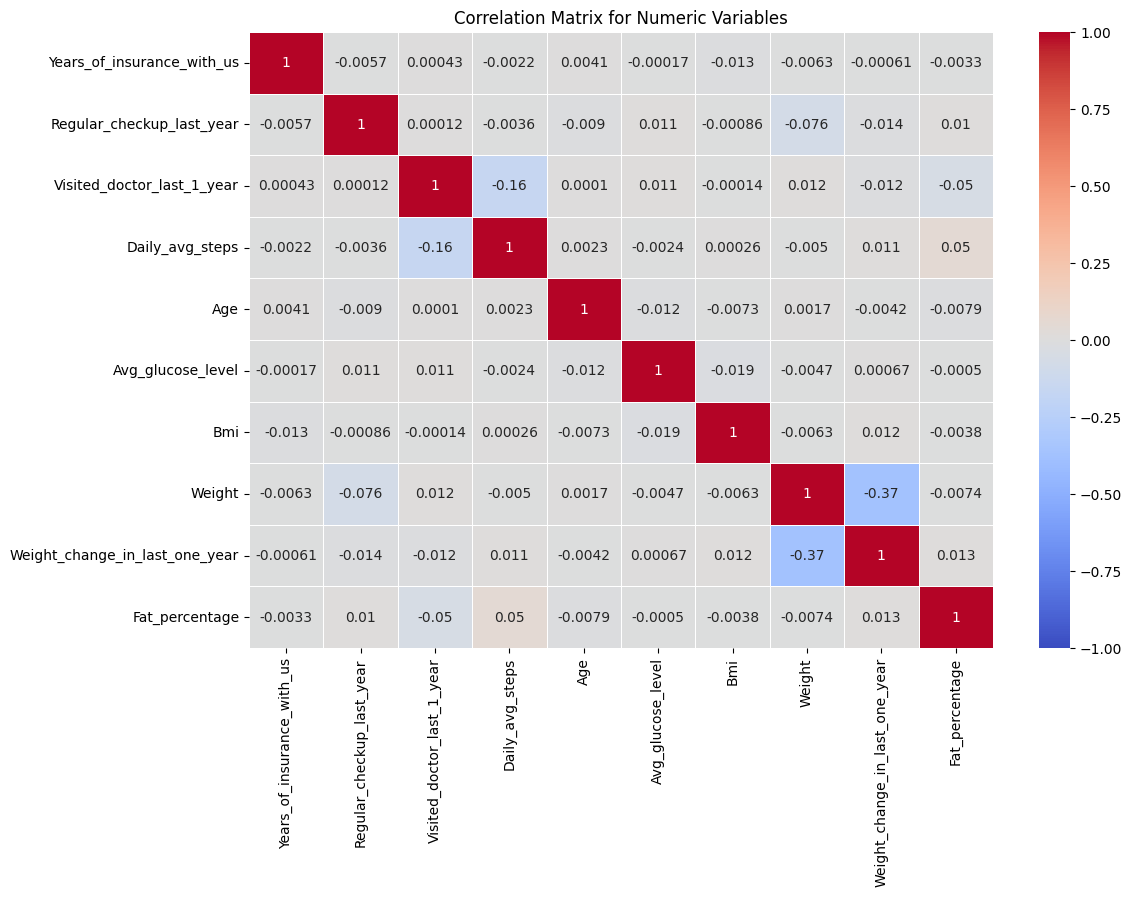

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the target variable (assuming your target variable is named 'target_variable')
df_corr = df.drop(columns=['Insurance_cost'])

# Select only numeric columns (excluding categorical variables)
numeric_df = df_corr.select_dtypes(include='number')

# Calculate the correlation matrix for numeric variables only
corr_matrix = numeric_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()



***Key Observations from the Matrix:***

---


1. **Weight and Weight Change (Last Year)**:
   - The correlation between **Weight** and **Weight_change_in_last_one_year** is **-0.37**. This is a moderate negative correlation, indicating that individuals who have higher weight are more likely to have experienced a decrease in weight over the past year. This suggests that individuals with higher body weight might have been focusing on reducing weight during the period.

2. **BMI and Weight**:
   - There is a very strong correlation (**close to 1**) between **BMI** and **Weight**. This is expected because BMI (Body Mass Index) is directly related to weight. This confirms that weight is one of the primary components influencing BMI.

3. **Visited Doctor in the Last Year and Daily Average Steps**:
   - The correlation between **Visited_doctor_last_1_year** and **Daily_avg_steps** is **-0.16**, which suggests a weak negative correlation. This might indicate that individuals who visit the doctor more often tend to have slightly lower daily average steps, potentially due to health concerns.

4. **Regular Checkups and Avg. Glucose Level | Weight Change in Last Year and Avg. Glucose Level**:
   - The correlation between **Regular_checkup_last_year** and **Avg_glucose_level** & **Weight_change_in_last_one_year** and **Avg_glucose_level** is quite low (**0.011**) & (**0.00067**) respectively, suggesting no significant relationship.

5. **Fat Percentage , Years of Insurance and Other Variables**:
   - **Fat_percentage** & **Years_of_insurance_with_us** does not seem to have a strong correlation with most variables.

**Insights and Possible Actions:**

---
   
1. **Encouraging More Physical Activity**:
   - The weak negative correlation between **Visited_doctor_last_1_year** and **Daily_avg_steps** suggests that individuals with health concerns who visit doctors may need encouragement to increase their physical activity levels.

2. **Glucose Monitoring**:
   - The lack of correlation between **Avg_glucose_level** and other variables like regular checkups and weight changes suggests that glucose levels might need to be monitored independently of other factors. Programs that promote regular glucose monitoring for everyone, not just those at risk, could be effective.

3. **Fat Percentage Monitoring**:
   - Given the weak correlations of **Fat_percentage** with most other variables, it would be beneficial to look deeper into why fat percentage isn't more closely linked with other health metrics like BMI and weight in this dataset. Perhaps this suggests that there are other underlying factors affecting fat percentage that need to be explored (e.g., diet, genetics).


***Age vs. Regular Checkup Last Year & Cholesterol Level***
   

---



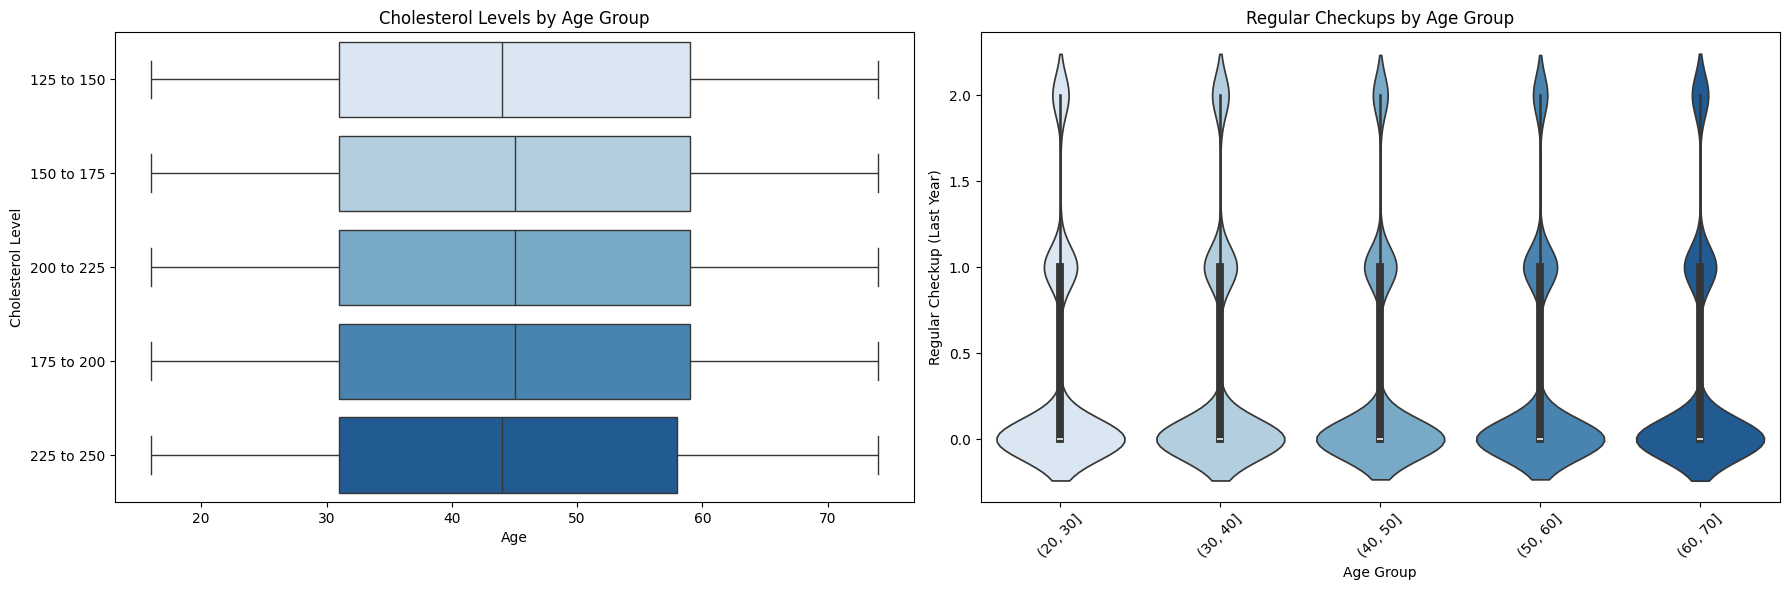

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a grid of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot: Age vs Cholesterol Levels
sns.boxplot(x='Age', y='Cholesterol_level', data=df, ax=axes[0], palette="Blues")
axes[0].set_title('Cholesterol Levels by Age Group')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Cholesterol Level')

# Creating age bins with integer intervals
age_bins = pd.cut(df['Age'], bins=range(20, 80, 10))  # Bins from 20 to 80 with an interval of 10

# Violin plot: Age bins vs Regular checkup last year
sns.violinplot(x=age_bins, y='Regular_checkup_last_year', data=df, ax=axes[1], palette="Blues")
axes[1].set_title('Regular Checkups by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Regular Checkup (Last Year)')

# Rotate x-ticks for the violin plot if needed
plt.xticks(rotation=45)  # Adjust for readability if age group labels are long

# Adjust the layout
plt.tight_layout()
plt.show()


**Age Distribution Across Regular Checkup**

---


**Majority of Individuals Have 0 or 1 Checkup:** Across all age groups, the majority of individuals have 0 or 1 regular checkup. This is evident from the wide bottom portion of each violin plot, indicating a high concentration at 0 checkups.

**Similar Distribution Across Age Groups:** The overall shape of the distribution remains fairly consistent across the age bins (20–30, 30–40, etc.), showing that age doesn't significantly affect the likelihood of attending regular checkups.
Insight: This suggests that factors other than age (like occupation, awareness, or access) might be influencing checkup frequency.
Slight Increase in Higher Checkup Frequency for Older Age Groups:

**Insight:** Only a small fraction of the population, regardless of age, appears to be utilizing healthcare services frequently for regular checkups. This could reflect limited access, lack of awareness, or perhaps a population generally in good health.

**Age Distribution Across Cholesterol Levels**

---


**Observation:** The boxplot shows the distribution of cholesterol levels across different age groups. The median age appears consistent across various cholesterol ranges, but there are a few variations in the spread (interquartile range).

**Interpretation:** There is no extreme skewness or significant variance in the cholesterol levels across age ranges. This suggests that cholesterol levels are not strongly dependent on age, and individuals of different ages can have a wide range of cholesterol levels.


***Weight Vs Weight_change_in_last_one_year***

---



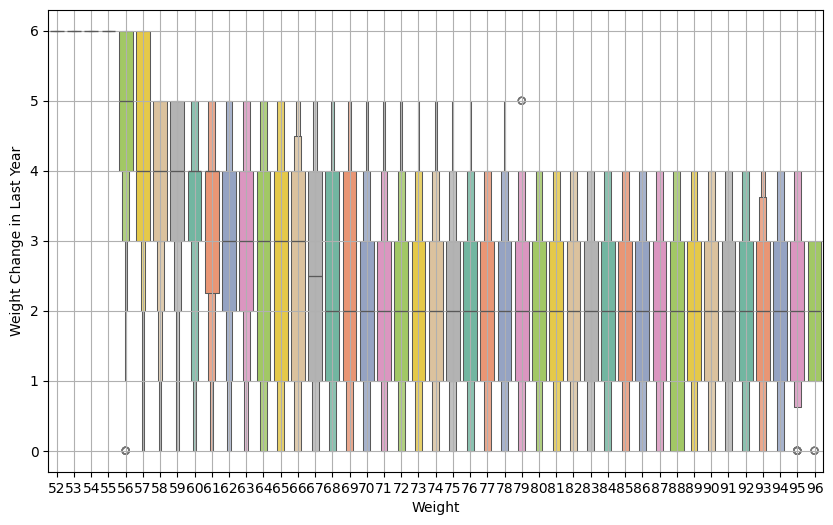

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Weight', y='Weight_change_in_last_one_year', data=df, palette='Set2')
plt.xlabel('Weight')
plt.ylabel('Weight Change in Last Year')
plt.grid(True)
plt.show()


***Key Insights:***

---



**Higher Weight Change for Lower Weights:**

Individuals with lower body weight (around 52–60 kg) exhibit greater weight changes in the last year, with some reaching 5-6 units of change.
This trend suggests that people with lower body weight tend to experience more volatile or significant fluctuations in their weight over time.

**Stabilization of Weight Change in Higher Weight Ranges:**

As we move into higher weight categories (from around 70 kg and above), the weight change becomes much more consistent. In fact, most individuals in this weight range experience only around 1-3 units of change.
There is a clear stabilization in weight change as body weight increases, indicating that heavier individuals are more likely to have stable weight with smaller fluctuations year-over-year.

**Outliers in Low and High Weight Categories:**

There are notable outliers in the lower and higher weight categories. Individuals around the 52-55 kg and 90-96 kg weight ranges have more extreme cases of no weight change (near zero) or significant weight changes (highly positive).
This indicates that while most people follow a certain pattern, there are exceptions where individuals experience extreme or no change at all.

***Relationship Between Weight Change & Adventure Sports Participation***

---



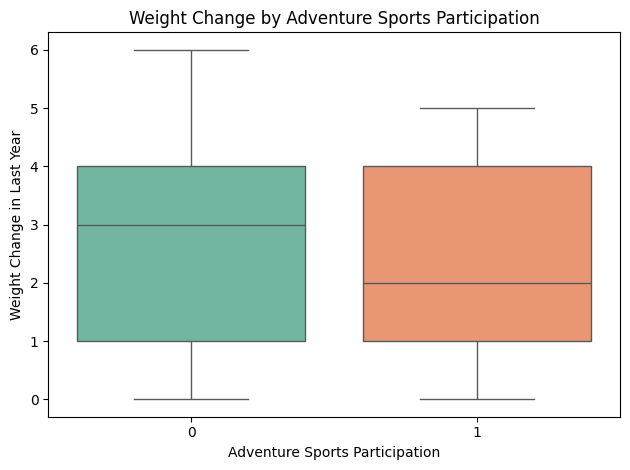

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# First plot: Weight Change and Adventure Sports
sns.boxplot(x='Adventure_sports', y='Weight_change_in_last_one_year', data=df, palette='Set2')

plt.title('Weight Change by Adventure Sports Participation')
plt.xlabel('Adventure Sports Participation')
plt.ylabel('Weight Change in Last Year')

# Adjust layout
plt.tight_layout()
plt.show()


**Insights:**

---


Adventure sports participants tend to experience lower and more consistent weight changes than non-participants.
This suggests that engaging in adventure sports may help stabilize weight changes, possibly due to increased physical activity.
The variation in weight change for non-participants could be influenced by other factors like lifestyle habits or health conditions.

***Average BMI of Heart Disease History by Cholesterol Level***

---



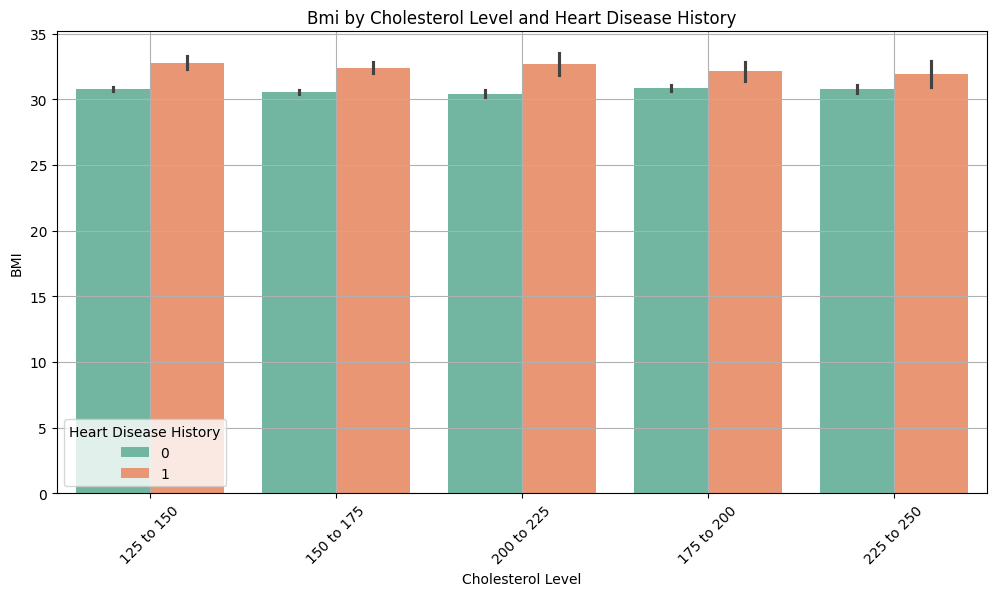

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute average Bmi values for each Cholesterol_level and Heart_decs_history
#avg_data = df.groupby(['Cholesterol_level', 'Heart_decs_history'])['Bmi'].mean().reset_index()

# Compute total average Bmi for each Cholesterol_level
#total_avg = avg_data.groupby('Cholesterol_level')['Bmi'].transform('sum')

# Calculate percentage
#avg_data['Percentage'] = (avg_data['Bmi'] / total_avg) * 100

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Cholesterol_level', y='Bmi', hue='Heart_decs_history', data=df, palette='Set2')

# Annotate bars with percentage values
#for container in ax.containers:
    #ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.title('Bmi by Cholesterol Level and Heart Disease History')
plt.xlabel('Cholesterol Level')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.legend(title='Heart Disease History')
plt.grid(True)
plt.show()


***Key Observations:***

---


**BMI Consistency Across Cholesterol Levels:**

The BMI values for both individuals with and without heart disease remain fairly consistent across cholesterol levels.
There is no significant increase or decrease in average BMI as cholesterol level increases, indicating that cholesterol levels don't have a strong direct correlation with BMI in this dataset.

**Difference in BMI for Heart Disease History:**

Individuals with a history of heart disease (orange bars) tend to have slightly higher BMI values than those without heart disease (green bars), though the difference is minimal.
For example, in the 125-150 and 225-250 cholesterol ranges, individuals with heart disease have a slightly higher average BMI compared to those without heart disease.

***Distribution of BMI and Weight change across Excercise***

---



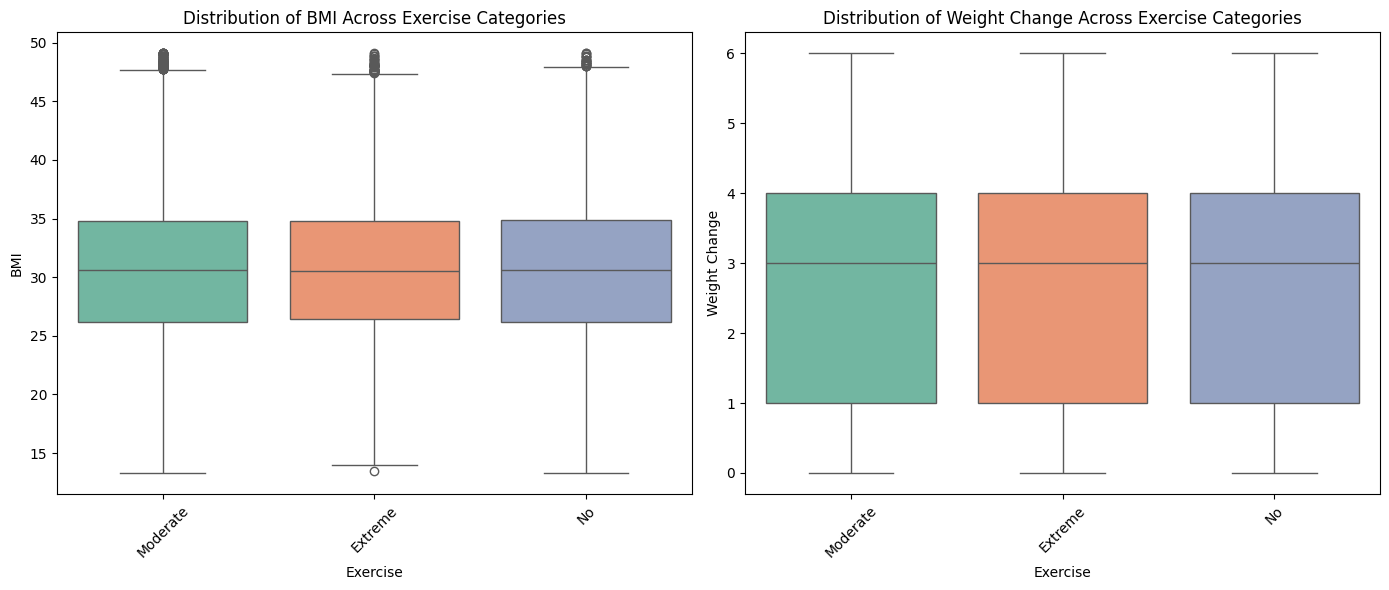

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined box plot
plt.figure(figsize=(14, 6))

# Plot for BMI
plt.subplot(1, 2, 1)
sns.boxplot(x='Exercise', y='Bmi', data=df, palette='Set2')
plt.title('Distribution of BMI Across Exercise Categories')
plt.xlabel('Exercise')
plt.ylabel('BMI')
plt.xticks(rotation=45)

# Plot for Weight Change
plt.subplot(1, 2, 2)
sns.boxplot(x='Exercise', y='Weight_change_in_last_one_year', data=df, palette='Set2')
plt.title('Distribution of Weight Change Across Exercise Categories')
plt.xlabel('Exercise')
plt.ylabel('Weight Change')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Exercise Type has No Effect on BMI or Weight Change**

---


The fact that the distributions of BMI and Weight Change are exactly the same for all three exercise types could indicate that exercise type is not a significant factor influencing either BMI or weight change within this dataset.
This implies that the level of physical activity (whether moderate, extreme, or none) might not be strongly correlated with changes in body weight or body mass index for the individuals in the dataset.



***Cholesterol Levels by Smoking and Alcohol Status***

---



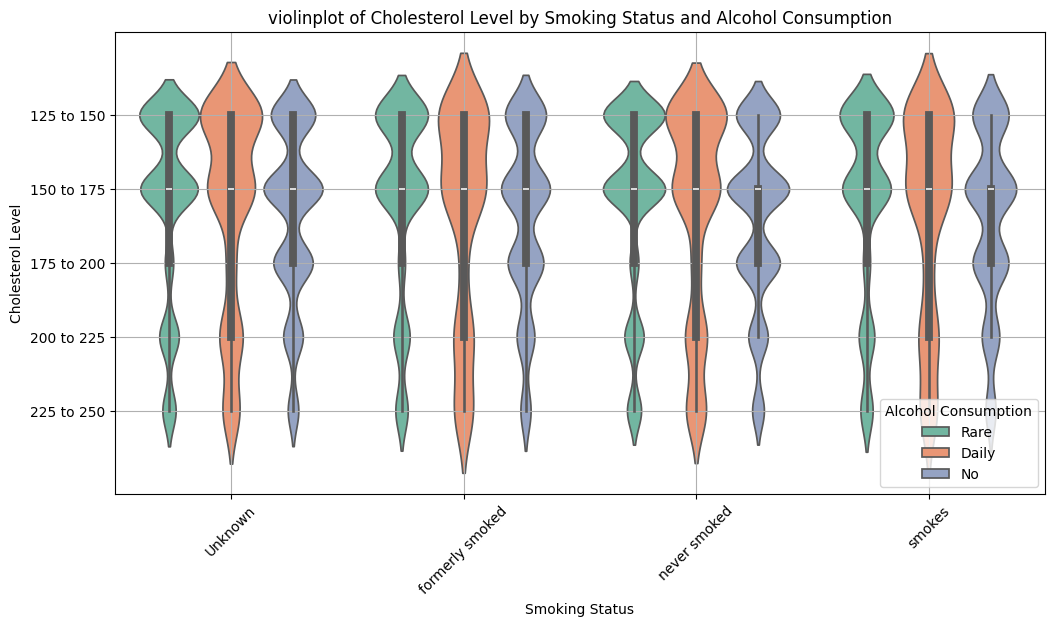

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Cholesterol_level' has categorical values like 'Low', 'Medium', 'High', etc.
# Define the order of Cholesterol levels
cholesterol_order = ['125 to 150', '150 to 175', '175 to 200', '200 to 225', '225 to 250']  # Replace with actual order in your dataset

# Convert Cholesterol_level to categorical type with specified order
df['Cholesterol_level'] = pd.Categorical(df['Cholesterol_level'], categories=cholesterol_order, ordered=True)

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Smoking_status', y='Cholesterol_level', hue='Alcohol', data=df, palette='Set2')
plt.title('violinplot of Cholesterol Level by Smoking Status and Alcohol Consumption')
plt.xlabel('Smoking Status')
plt.ylabel('Cholesterol Level')
plt.xticks(rotation=45)
plt.legend(title='Alcohol Consumption')
plt.grid(True)
plt.show()


**Key Insights from the Violin Plot of Cholesterol Level by Smoking Status and Alcohol Consumption:**

---



1. **Cholesterol Distribution across Smoking Categories**:
   
   - The shapes of the violins are **similar** across all smoking statuses ("unknown", "formerly smoked", "never smoked", "smokes"). This suggests that **smoking status alone may not be a dominant factor** influencing cholesterol levels in this dataset.
   - There are slightly wider distributions in the categories of **"never smoked"** and **"formerly smoked"**, which could imply more variability in cholesterol levels for individuals who have quit or never smoked.

3. **Alcohol Consumption and Cholesterol Levels**:
   - People who consume alcohol **daily** (orange violins) have a generally **wider spread** of cholesterol levels, across all smoking statuses.
   - **Rare alcohol consumers** (green violins) and **non-drinkers** (blue violins) have similar distributions but with **less spread** in the higher cholesterol ranges.
   - Daily alcohol drinkers exhibit **slightly higher cholesterol levels** compared to rare or non-drinkers, as shown by the thickened areas around the **200 mg/dL** mark.

4. **Former Smokers and Higher Cholesterol**:
   - Among the **formerly smoked** category, individuals with **daily alcohol consumption** appear to have **slightly higher cholesterol levels**. This suggests that a combination of **past smoking and regular alcohol consumption** may be associated with **higher cholesterol levels**.

5. **Stable Cholesterol Levels for Non-Smokers with Rare or No Alcohol**:
   - For individuals who **never smoked** and consume **rare or no alcohol**, cholesterol levels seem more concentrated in the **150-175 mg/dL** range, indicating **lower variability** and generally **lower cholesterol levels** in this group.
   
6. **Smokers with Alcohol Consumption**:
   - **Current smokers** with **daily alcohol consumption** tend to have a wider spread of cholesterol levels, particularly in the **150-200 mg/dL range**. This suggests a potential **risk factor** for higher cholesterol in individuals who both smoke and consume alcohol regularly.


**Weight Change in Last Year by Alcohol Consumption**

---



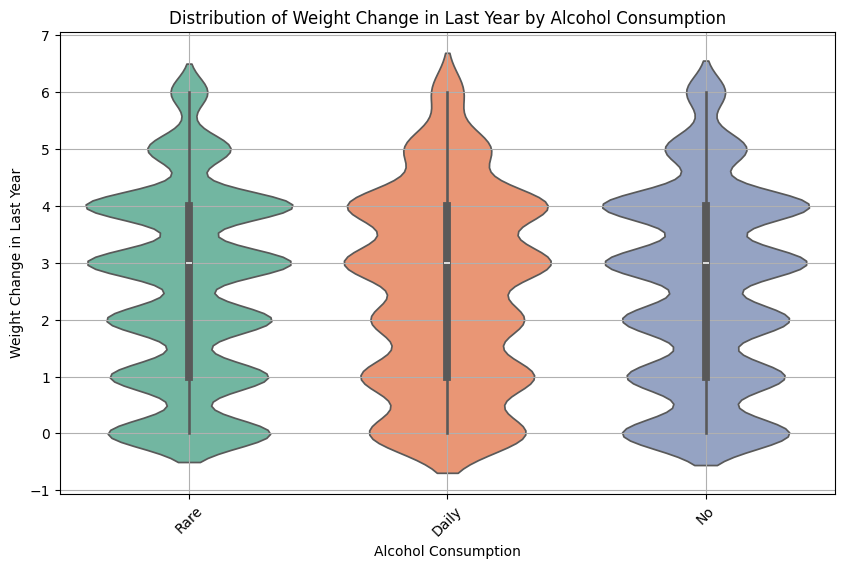

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Alcohol', y='Weight_change_in_last_one_year', data=df, palette='Set2')
plt.title('Distribution of Weight Change in Last Year by Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Weight Change in Last Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Key Insights from the Violin Plot of Weight Change in Last Year by Alcohol Consumption:**

---



1. **Weight Change Distribution Across Alcohol Consumption Groups**:
   - The weight change in the last year varies between approximately **-1 to +6 units** for all three alcohol consumption categories ("Rare", "Daily", "No").
   - On average, most individuals experienced a moderate weight gain over the past year, regardless of their alcohol consumption habits.

3. **Rare and No Alcohol Consumers** Show Similar Patterns:
   - **Rare** (green violin) and **No alcohol consumers** (blue violin) exhibit **similar distributions**, with slightly **wider variability** compared to daily drinkers. These two groups appear to have more individuals with **both smaller and larger weight changes**.
   
6. **Higher Maximum Weight Gain in Daily Drinkers**:
   - Individuals in the **daily alcohol consumption** group exhibit a **higher upper range** of weight change, with some reaching **up to +6 units**, while the other groups tend to stay just below this level.
   - This could suggest that daily alcohol consumption might correlate with slightly higher overall weight gain over the year, although the majority still center around similar weight change values.

These insights suggest that while alcohol consumption may play a role in weight change, the overall patterns of weight gain are **similar** across different drinking behaviors.

***Average Glucose Level & Cholesterol Level vs. Daily Average Steps***

---



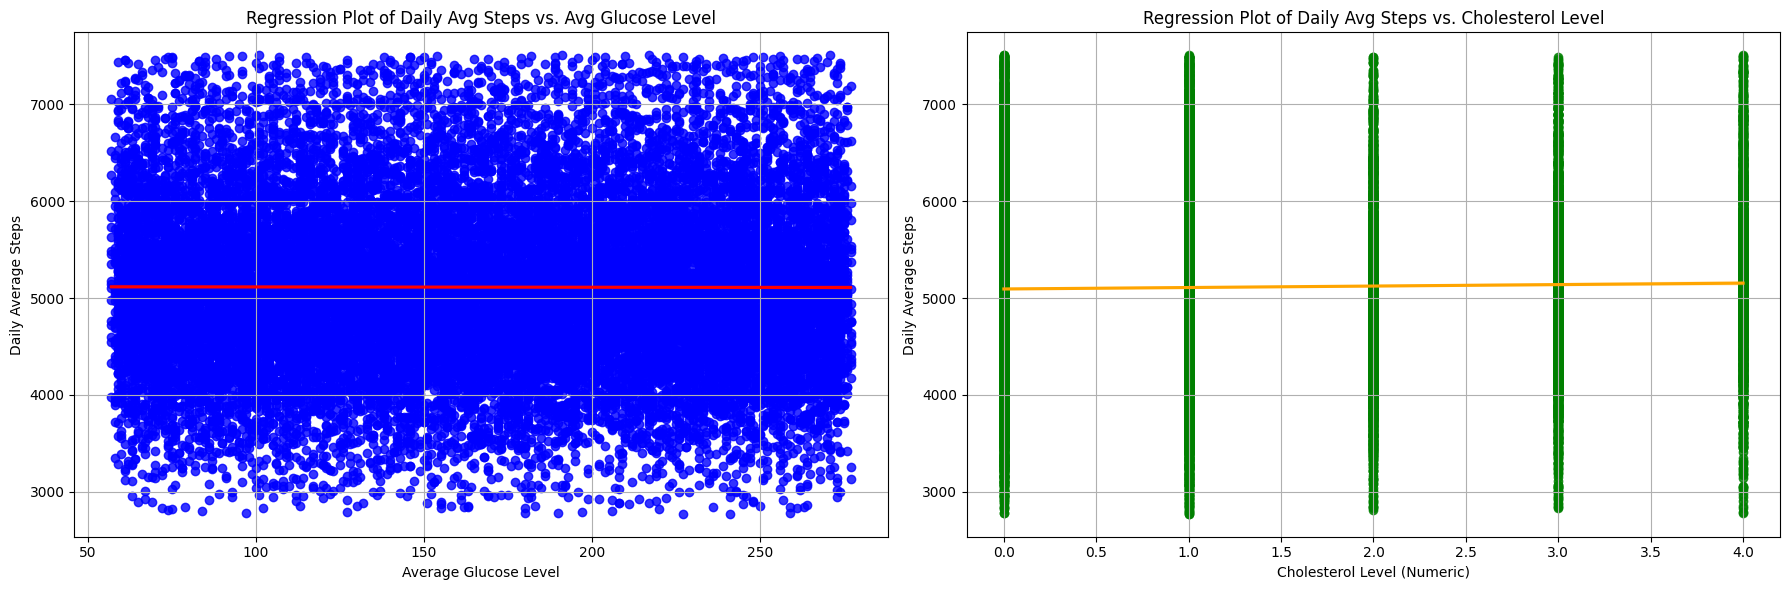

In [ ]:
# Convert categorical variable to numerical for the regression plot
df['Cholesterol_level_num'] = df['Cholesterol_level'].astype('category').cat.codes

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Regression plot for Daily_avg_steps vs. Avg_glucose_level
sns.regplot(x='Avg_glucose_level', y='Daily_avg_steps', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title('Regression Plot of Daily Avg Steps vs. Avg Glucose Level')
axes[0].set_xlabel('Average Glucose Level')
axes[0].set_ylabel('Daily Average Steps')
axes[0].grid(True)

# Plot 2: Regression plot for Daily_avg_steps vs. Cholesterol_level
sns.regplot(x='Cholesterol_level_num', y='Daily_avg_steps', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'}, ax=axes[1])
axes[1].set_title('Regression Plot of Daily Avg Steps vs. Cholesterol Level')
axes[1].set_xlabel('Cholesterol Level (Numeric)')
axes[1].set_ylabel('Daily Average Steps')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Key Insights:**

---


**No Impact of Daily Steps on Glucose and Cholesterol Levels:**

The straight horizontal regression line suggests that the daily average steps do not significantly impact or predict changes in the average glucose level or cholesterol level.
This indicates that individuals' average glucose and cholesterol levels remain roughly constant regardless of how many steps they take each day.

***Regression Plot of Weight, Cholesterol Level vs. Fat Percentage***

---



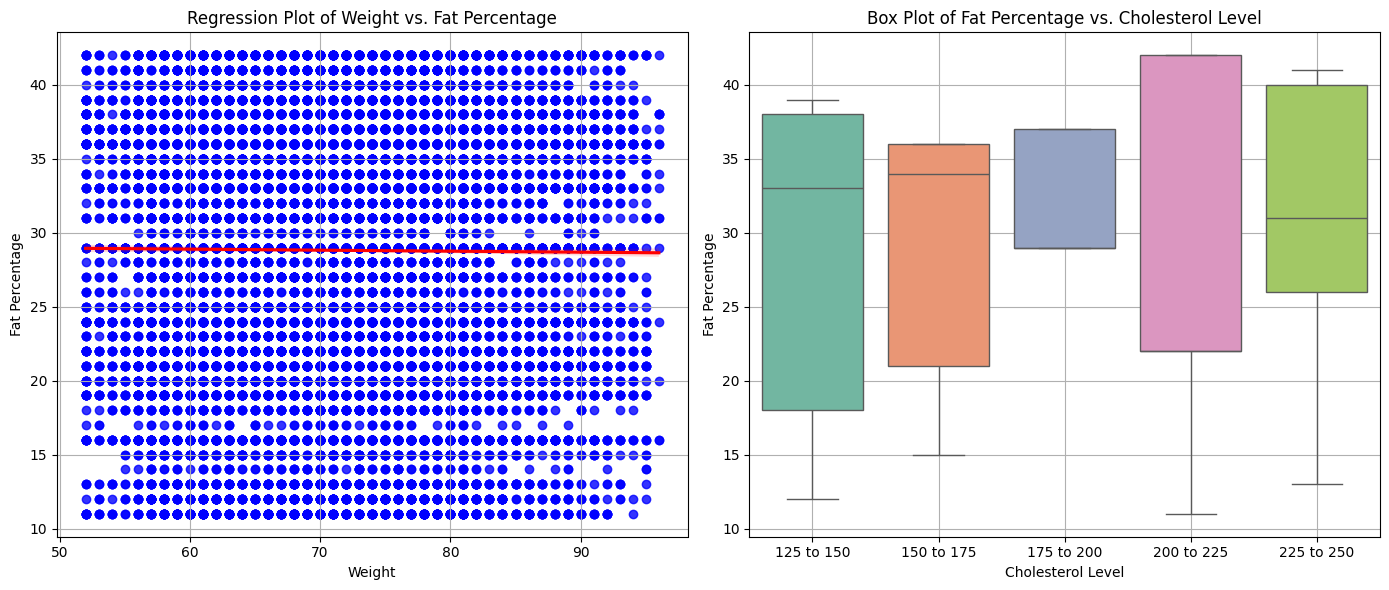

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot with regression line for Weight vs. Fat_percentage
sns.regplot(x='Weight', y='Fat_percentage', data=df, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Regression Plot of Weight vs. Fat Percentage')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Fat Percentage')
axes[0].grid(True)

# Box plot for Fat Percentage vs. Cholesterol Level
sns.boxplot(x='Cholesterol_level', y='Fat_percentage', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Box Plot of Fat Percentage vs. Cholesterol Level')
axes[1].set_xlabel('Cholesterol Level')
axes[1].set_ylabel('Fat Percentage')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


***Regression Plot of Weight vs. Fat Percentage***


---


1. **Distribution of Fat Percentage**:
   - The fat percentage appears fairly evenly spread across various weight ranges, with no strong correlation between weight and fat percentage.
   - Most data points are clustered around 15% to 40% fat for all weight categories (ranging from 50 to 90 kg).
   - The regression line (red) is almost flat, indicating that there is **no strong linear relationship** between weight and fat percentage.
   
**Right Plot: Box Plot of Fat Percentage vs. Cholesterol Level**

---


1. **Fat Percentage Distribution**:
    - There seems to be a **positive relationship between cholesterol levels and fat percentage**. People with higher cholesterol tend to have more body fat. The group with the lowest cholesterol has less body fat, while the group with cholesterol between 200 and 225 has the most.
    - As cholesterol increases, fat percentage generally goes up, which might suggest a connection between higher cholesterol and higher body fat.



***To compare the Insurance_cost (target variable) with Occupation, Gender, Region, and Covered_by_any_other_company***

---



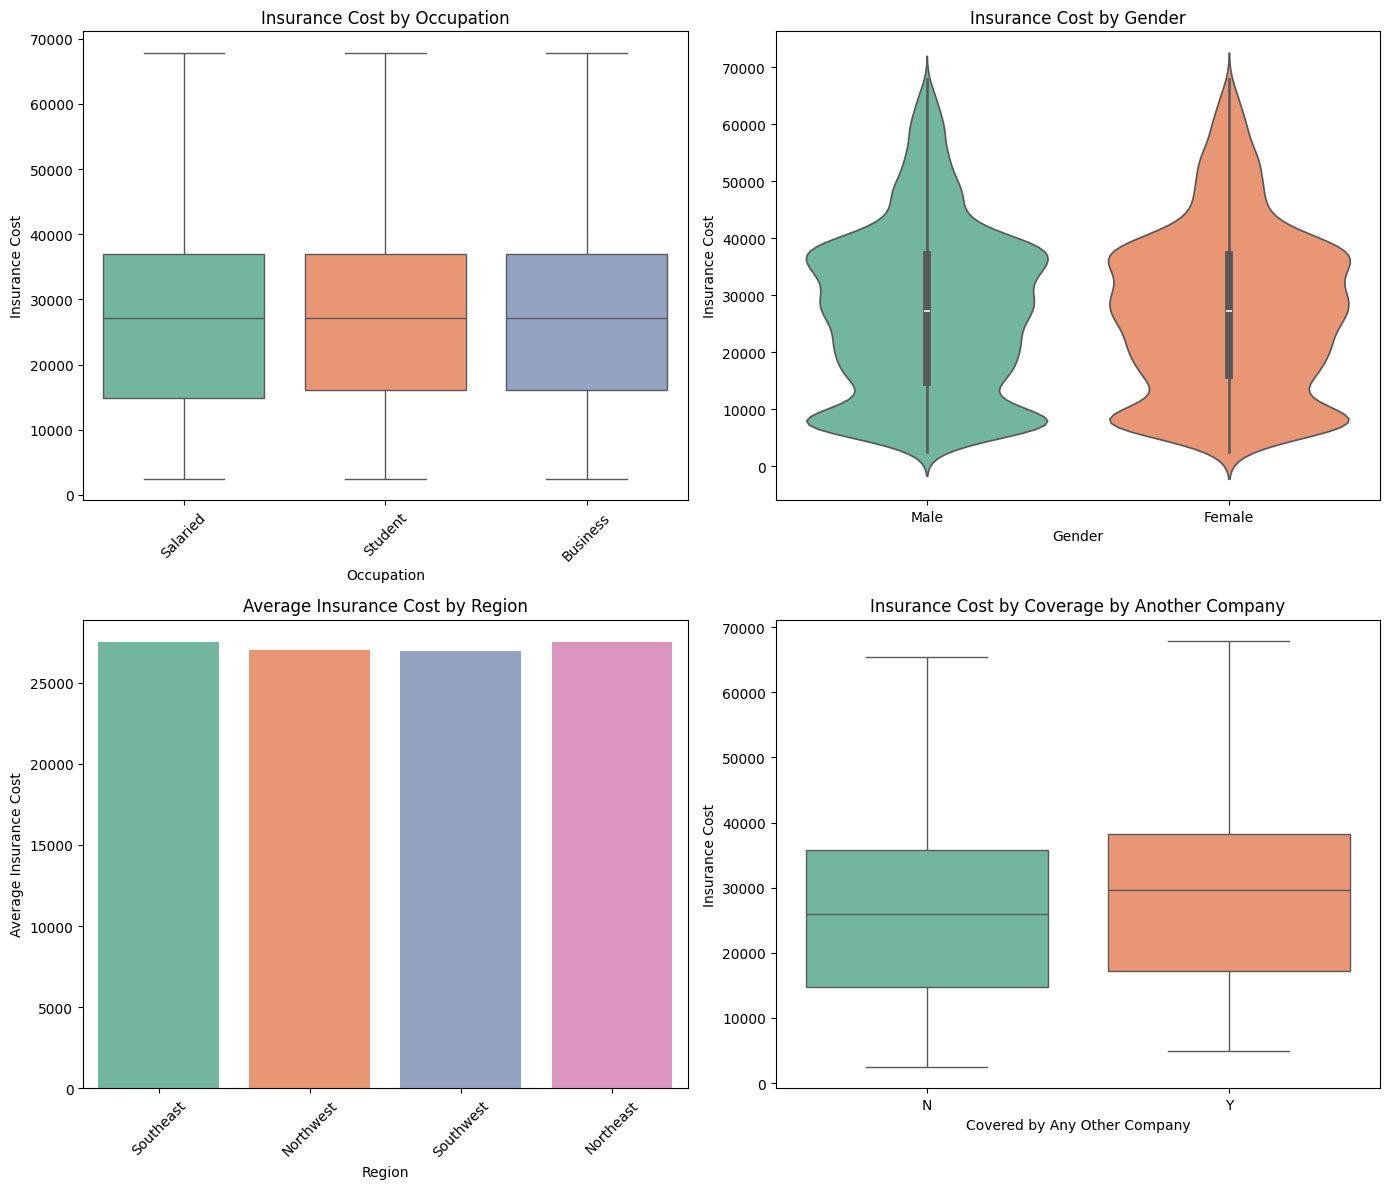

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Box plot for Insurance Cost vs. Occupation
sns.boxplot(x='Occupation', y='Insurance_cost', data=df, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Insurance Cost by Occupation')
axes[0, 0].set_xlabel('Occupation')
axes[0, 0].set_ylabel('Insurance Cost')
axes[0, 0].tick_params(axis='x', rotation=45)

# Violin plot for Insurance Cost vs. Gender
sns.violinplot(x='Gender', y='Insurance_cost', data=df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Insurance Cost by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Insurance Cost')

# Bar plot for Insurance Cost vs. Region
sns.barplot(x='Region', y='Insurance_cost', data=df, palette='Set2', ci=None, ax=axes[1, 0])
axes[1, 0].set_title('Average Insurance Cost by Region')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Average Insurance Cost')
axes[1, 0].tick_params(axis='x', rotation=45)

# Box plot for Insurance Cost vs. Covered by Any Other Company
sns.boxplot(x='Covered_by_any_other_company', y='Insurance_cost', data=df, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Insurance Cost by Coverage by Another Company')
axes[1, 1].set_xlabel('Covered by Any Other Company')
axes[1, 1].set_ylabel('Insurance Cost')

# Adjust layout
plt.tight_layout()
plt.show()


1. **Insurance Cost by Occupation**:
   - **Salaried, Student, and Business** occupations have similar distributions of insurance costs.
   - Median costs are fairly close for all three groups, No clear  differences, indicating that **Occupation** does not seem to play a major role in determining average insurance costs.
   

2. **Insurance Cost by Gender**:
   - **Male and Female** genders have almost identical distributions of insurance costs.
   - There doesn’t seem to be a significant difference in insurance cost between genders.

3. **Average Insurance Cost by Region**:
   - The **average insurance cost** is nearly the same across all regions (Southeast, Northwest, Southwest, and Northeast).
   - No clear regional differences, indicating that **region** does not seem to play a major role in determining average insurance costs.

4. **Insurance Cost by Coverage by Another Company**:
   - Whether someone is **covered by another company or not** ("N" for No, "Y" for Yes), there is little difference in insurance costs.
   - i.e, Being covered by another insurance company doesn’t seem to lead to a significant difference in costs.




***K-Means Clustering & Steps to Perform***

---

**Data Preparation :  Encoding & Scaling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming df is your DataFrame

# Categorical and numerical columns

categorical_columns = ['Adventure_sports', 'Occupation', 'Cholesterol_level', 'Heart_decs_history',
                       'Other_major_decs_history', 'Gender', 'Smoking_status',
                       'Covered_by_any_other_company', 'Alcohol', 'Exercise', 'Region']

numerical_columns = ['Years_of_insurance_with_us', 'Regular_checkup_last_year', 'Visited_doctor_last_1_year',
                     'Daily_avg_steps', 'Age', 'Avg_glucose_level', 'Bmi', 'Weight',
                     'Weight_change_in_last_one_year', 'Fat_percentage']


# Target variable
target = 'Insurance_cost'

# Split the data into features (X) and target (y)
X = df.drop(target, axis=1)
y = df[target]

# Scale numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# One-Hot Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse
X_encoded = encoder.fit_transform(X[categorical_columns])

# Create a DataFrame for the encoded categorical features
encoded_columns = encoder.get_feature_names_out(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Concatenate the scaled numerical features with the encoded categorical features
X_transformed_df = pd.concat([X[numerical_columns].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Print the transformed DataFrame
X_transformed_df.head()


,Years_of_insurance_with_us,Regular_checkup_last_year,Visited_doctor_last_1_year,Daily_avg_steps,Age,Avg_glucose_level,Bmi,Weight,Weight_change_in_last_one_year,Fat_percentage,Adventure_sports_1,Occupation_Salaried,Occupation_Student,Cholesterol_level_150 to 175,Cholesterol_level_175 to 200,Cholesterol_level_200 to 225,Cholesterol_level_225 to 250,Heart_decs_history_1,Other_major_decs_history_1,Gender_Male,Smoking_status_formerly smoked,Smoking_status_never smoked,Smoking_status_smokes,Covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,Exercise_Moderate,Exercise_No,Region_Northwest,Region_Southeast,Region_Southwest
0,-0.42,1.00,-0.99,-0.29,-1.05,-1.12,0.06,-0.49,-0.90,-0.44,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00
1,-1.57,-0.57,0.84,1.52,0.32,0.71,0.52,-1.46,0.29,-0.21,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00
2,-1.19,-0.57,0.84,-0.71,1.43,-0.02,1.45,0.15,-1.49,0.37,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,1.12,-0.57,-0.99,1.29,0.38,-0.93,-1.19,-0.07,0.29,0.95,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
4,-0.42,1.00,-0.99,-0.20,-0.06,-0.79,-0.65,0.26,-1.49,0.60,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00


***Recursive Feature Elimination (RFE) with Random Forest Regressor***

---



In [ ]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Use X_transformed_df, which is the combination of scaled numerical and encoded categorical data
X = X_transformed_df

# y is the target variable 'Insurance_cost'
y = df['Insurance_cost']

# Initialize the model
model = RandomForestRegressor()

# Apply Recursive Feature Elimination (RFE) with RandomForest
rfe = RFE(model, n_features_to_select=10)  # Select 10 most important features
X_rfe = rfe.fit_transform(X, y)

# To see which features were selected, you can use:
selected_features = X_transformed_df.columns[rfe.support_]

# Print selected features
print("Selected Features: ", selected_features)


Selected Features:  Index(['Years_of_insurance_with_us', 'Visited_doctor_last_1_year',
       'Daily_avg_steps', 'Age', 'Avg_glucose_level', 'Bmi', 'Weight',
       'Weight_change_in_last_one_year', 'Fat_percentage',
       'Covered_by_any_other_company_Y'],
      dtype='object')


***K-Means Clustering***

---



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=16)
kmeans.fit(X_rfe)
labels = kmeans.labels_

silhouette_avg = silhouette_score(X_rfe, labels)
silhouette_avg

0.0861173798351673

A silhouette score of around 0.0848 suggests that the clustering might not be very effective. Silhouette scores range from -1 to 1, where values close to 1 indicate well-separated clusters, values around 0 suggest overlapping clusters, and negative values indicate that data points might be assigned to the wrong clusters.

If you want to improve the clustering, consider experimenting with different algorithms, adjusting parameters, or exploring feature selection/engineering. Let me know if you need help with anything specific!

***Elbow Method***

---



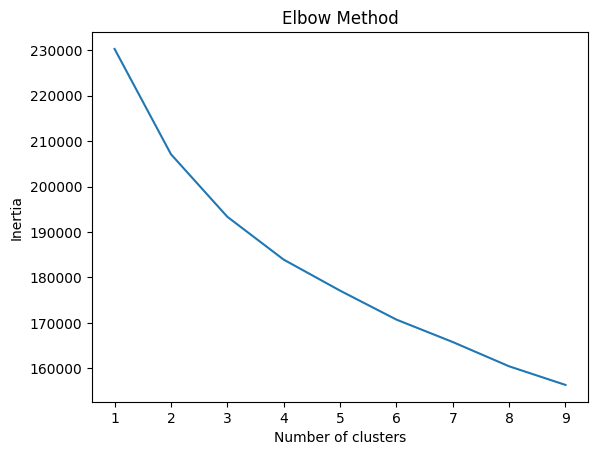

In [ ]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X_rfe)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your features are in X_transformed_df (as per previous scaling steps)
# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=16)

# Fit the model to your scaled data
kmeans.fit(X_rfe)

# Get the cluster labels
clusters = kmeans.labels_

# Add the cluster labels to the original DataFrame (optional)
df['Cluster'] = clusters

sil_score = silhouette_score(X_rfe, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.0861173798351673


***Customer Profiling***

---



In [ ]:
df.Cluster.value_counts().sort_index()

,count
Cluster,
0,7541
1,8191
2,9268


In [ ]:
# Assuming 'clusters' is the array of cluster labels from KMeans or another clustering model
df['Cluster'] = clusters  # Ensure the cluster labels are in the DataFrame

# Filter only numeric columns for aggregation
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by cluster and calculate the mean for numeric columns only
clust_profile = df.groupby('Cluster')[numeric_columns].mean()

# Calculate the frequency of each cluster and add it as a column
clust_profile['freq'] = df['Cluster'].value_counts().sort_index()

# Display the cluster profile
clust_profile


,Years_of_insurance_with_us,Regular_checkup_last_year,Visited_doctor_last_1_year,Daily_avg_steps,Age,Avg_glucose_level,Bmi,Weight,Weight_change_in_last_one_year,Fat_percentage,Insurance_cost,Cholesterol_level_num,Cluster,freq
Cluster,,,,,,,,,,,,,,
0,4.06,0.38,2.94,5141.50,44.69,168.60,30.93,62.33,4.19,29.21,13398.91,1.28,0.00,7541
1,4.13,0.35,3.94,4603.94,44.73,170.89,30.87,75.06,1.88,25.67,32216.73,1.17,1.00,8191
2,4.07,0.35,2.44,5538.57,45.27,163.69,30.60,76.11,1.72,31.26,33853.78,1.34,2.00,9268


**Model building and interpretation : Linear Regression using statsmodel(OLS)**

In [ ]:
import statsmodels.api as sm

X = X_transformed_df  # Your scaled and encoded features
y = df['Insurance_cost']  # Target variable

In [ ]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train_OLS, X_test_OLS, y_train_OLS, y_test_OLS = train_test_split(X, y, test_size=0.25 , random_state=16)

In [ ]:
X_train_OLS=sm.add_constant(X_train_OLS)# This adds the constant term beta0 to the Simple Linear Regression.
X_test_OLS=sm.add_constant(X_test_OLS)

model = sm.OLS(y_train_OLS,X_train_OLS).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Insurance_cost   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:57:16   Log-Likelihood:            -1.7901e+05
No. Observations:               18750   AIC:                         3.581e+05
Df Residuals:                   18718   BIC:                         3.583e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_OLS.values, i) for i in range(X_train_OLS.shape[1])],
    index=X_train_OLS.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                            39.64
Years_of_insurance_with_us        1.08
Regular_checkup_last_year         1.01
Visited_doctor_last_1_year        1.04
Daily_avg_steps                   1.06
Age                               1.00
Avg_glucose_level                 1.00
Bmi                               1.20
Weight                            1.19
Weight_change_in_last_one_year    1.18
Fat_percentage                    1.24
Adventure_sports_1                1.01
Occupation_Salaried               4.60
Occupation_Student                2.89
Cholesterol_level_150 to 175      2.34
Cholesterol_level_175 to 200      2.64
Cholesterol_level_200 to 225      2.71
Cholesterol_level_225 to 250      1.74
Heart_decs_history_1              1.03
Other_major_decs_history_1        1.05
Gender_Male                       1.25
Smoking_status_formerly smoked    1.47
Smoking_status_never smoked       1.56
Smoking_status_smokes             1.40
Covered_by_any_other_company_Y    1.08
Alcohol_No 

**Summary of Insights on VIF < 2:**

No Multicollinearity: Variables with VIF values below 2 indicate low or no multicollinearity, meaning they do not overlap in the information they provide and can be included in the model without redundancy.

**Key Independent Predictors:**

Age, Years_of_insurance_with_us, Regular_checkup_last_year, Visited_doctor_last_1_year, and Weight are examples of variables with VIF < 2. These can be confidently used as they independently contribute to explaining insurance costs.

In [ ]:
#1) Removing predictor 'Occupation_Salaried' as VIF>2
X_train_OLS2 = X_train_OLS.drop(["Occupation_Salaried"], axis=1)
olsmod_1 = sm.OLS(y_train_OLS, X_train_OLS2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.944 
Adjusted R-squared: 0.944


In [ ]:
X_train_OLS = X_train_OLS.drop(["Occupation_Salaried"], axis=1)

In [ ]:
# let's check the VIF of the predictors after removing 'Occupation_Salaried'
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_OLS.values, i) for i in range(X_train_OLS.shape[1])],
    index=X_train_OLS.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                            28.82
Years_of_insurance_with_us        1.08
Regular_checkup_last_year         1.01
Visited_doctor_last_1_year        1.04
Daily_avg_steps                   1.06
Age                               1.00
Avg_glucose_level                 1.00
Bmi                               1.20
Weight                            1.19
Weight_change_in_last_one_year    1.18
Fat_percentage                    1.06
Adventure_sports_1                1.01
Occupation_Student                1.53
Cholesterol_level_150 to 175      1.38
Cholesterol_level_175 to 200      1.65
Cholesterol_level_200 to 225      1.51
Cholesterol_level_225 to 250      1.38
Heart_decs_history_1              1.03
Other_major_decs_history_1        1.05
Gender_Male                       1.25
Smoking_status_formerly smoked    1.47
Smoking_status_never smoked       1.56
Smoking_status_smokes             1.40
Covered_by_any_other_company_Y    1.08
Alcohol_No                        2.87
Alcohol_Rar

In [ ]:
#2) Removing predictor 'Alcohol_No' as VIF>2
X_train_OLS3 = X_train_OLS.drop(["Alcohol_No"], axis=1)
olsmod_2 = sm.OLS(y_train_OLS, X_train_OLS3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.944 
Adjusted R-squared: 0.944


In [ ]:
X_train_OLS = X_train_OLS.drop(["Alcohol_No"], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_OLS.values, i) for i in range(X_train_OLS.shape[1])],
    index=X_train_OLS.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                            22.64
Years_of_insurance_with_us        1.08
Regular_checkup_last_year         1.01
Visited_doctor_last_1_year        1.04
Daily_avg_steps                   1.06
Age                               1.00
Avg_glucose_level                 1.00
Bmi                               1.20
Weight                            1.19
Weight_change_in_last_one_year    1.17
Fat_percentage                    1.06
Adventure_sports_1                1.01
Occupation_Student                1.53
Cholesterol_level_150 to 175      1.38
Cholesterol_level_175 to 200      1.61
Cholesterol_level_200 to 225      1.51
Cholesterol_level_225 to 250      1.38
Heart_decs_history_1              1.03
Other_major_decs_history_1        1.05
Gender_Male                       1.25
Smoking_status_formerly smoked    1.47
Smoking_status_never smoked       1.56
Smoking_status_smokes             1.40
Covered_by_any_other_company_Y    1.08
Alcohol_Rare                      1.07
Exercise_Mo

In [ ]:
#2) Removing predictor 'Region_Southwest' as VIF>2
X_train_OLS4 = X_train_OLS.drop(["Region_Southwest"], axis=1)
olsmod_3 = sm.OLS(y_train_OLS, X_train_OLS4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.944 
Adjusted R-squared: 0.944


In [ ]:
X_train_OLS = X_train_OLS.drop(["Region_Southwest"], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_OLS.values, i) for i in range(X_train_OLS.shape[1])],
    index=X_train_OLS.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                            16.63
Years_of_insurance_with_us        1.08
Regular_checkup_last_year         1.01
Visited_doctor_last_1_year        1.04
Daily_avg_steps                   1.06
Age                               1.00
Avg_glucose_level                 1.00
Bmi                               1.20
Weight                            1.19
Weight_change_in_last_one_year    1.17
Fat_percentage                    1.06
Adventure_sports_1                1.01
Occupation_Student                1.53
Cholesterol_level_150 to 175      1.38
Cholesterol_level_175 to 200      1.61
Cholesterol_level_200 to 225      1.51
Cholesterol_level_225 to 250      1.38
Heart_decs_history_1              1.03
Other_major_decs_history_1        1.05
Gender_Male                       1.25
Smoking_status_formerly smoked    1.47
Smoking_status_never smoked       1.56
Smoking_status_smokes             1.40
Covered_by_any_other_company_Y    1.08
Alcohol_Rare                      1.07
Exercise_Mo

In [ ]:
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:         Insurance_cost   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:57:22   Log-Likelihood:            -1.7901e+05
No. Observations:               18750   AIC:                         3.581e+05
Df Residuals:                   18721   BIC:                         3.583e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Removing the non-significant predictor variables.**

In [ ]:
import statsmodels.api as sm

# Step 1: Identify insignificant variables (p-value > 0.05)
insignificant_vars = [
    'Years_of_insurance_with_us','Visited_doctor_last_1_year','Daily_avg_steps','Avg_glucose_level','Bmi','Fat_percentage','Occupation_Student','Cholesterol_level_150 to 175',
    'Cholesterol_level_175 to 200','Cholesterol_level_200 to 225','Cholesterol_level_225 to 250','Other_major_decs_history_1', 'Gender_Male', 'Smoking_status_formerly smoked',
    'Smoking_status_never smoked','Smoking_status_smokes', 'Alcohol_Rare', 'Exercise_Moderate',  'Exercise_No', 'Region_Southeast','Region_Northwest']

# Step 2: Drop the insignificant variables from X_train
X_train_OLS = X_train_OLS.drop(insignificant_vars, axis=1)

# Step 3: Refit the model
olsmod_3 = sm.OLS(y_train_OLS, X_train_OLS)
olsres_3 = olsmod_3.fit()

# Step 4: Print the updated summary
print(olsres_3.summary())


                            OLS Regression Results                            
Dep. Variable:         Insurance_cost   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 4.505e+04
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:57:22   Log-Likelihood:            -1.7902e+05
No. Observations:               18750   AIC:                         3.581e+05
Df Residuals:                   18742   BIC:                         3.581e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Retain only the relevant columns in X_test
X_test_OLS = X_test_OLS[['const', 'Regular_checkup_last_year', 'Age', 'Weight',
                 'Weight_change_in_last_one_year', 'Adventure_sports_1',
                 'Heart_decs_history_1', 'Covered_by_any_other_company_Y']]

# Now X_train and X_test have the same columns
print("Updated X_test columns:\n", X_test_OLS.columns)


Updated X_test columns:
 Index(['const', 'Regular_checkup_last_year', 'Age', 'Weight',
       'Weight_change_in_last_one_year', 'Adventure_sports_1',
       'Heart_decs_history_1', 'Covered_by_any_other_company_Y'],
      dtype='object')


---Train Data Evaluation---
Train RMSE: 3390.50
Train MAPE: 15.48%
Train R-squared: 0.9439
Train Adjusted R-squared: 0.9439

---Test Data Evaluation---
Test RMSE: 3412.59
Test MAPE: 15.02%
Test R-squared: 0.9434
Test Adjusted R-squared: 0.9433


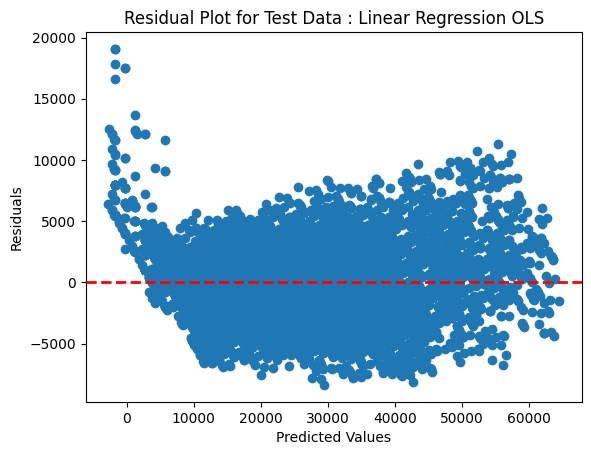

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


# Get predicted values from the model
y_test_pred = olsres_3.predict(X_test_OLS)
y_train_pred = olsres_3.predict(X_train_OLS)

# Evaluation metrics
print("---Train Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train_OLS, y_train_pred))
print(f'Train RMSE: {rmse_train:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_train = mean_absolute_percentage_error(y_train_OLS, y_train_pred) * 100  # In percentage
print(f'Train MAPE: {mape_train:.2f}%')

# R-squared (Coefficient of Determination)
r2_train = r2_score(y_train_OLS, y_train_pred)
print(f'Train R-squared: {r2_train:.4f}')

# Adjusted R-squared
n_train = len(y_train_OLS)  # Number of observations in train
p_train = X_train_OLS.shape[1]  # Number of predictors (features) in train
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))
print(f'Train Adjusted R-squared: {adjusted_r2_train:.4f}')

# Test Data Evaluation
print("\n---Test Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_test = np.sqrt(mean_squared_error(y_test_OLS, y_test_pred))
print(f'Test RMSE: {rmse_test:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_test = mean_absolute_percentage_error(y_test_OLS, y_test_pred) * 100  # In percentage
print(f'Test MAPE: {mape_test:.2f}%')

# R-squared (Coefficient of Determination)
r2_test = r2_score(y_test_OLS, y_test_pred)
print(f'Test R-squared: {r2_test:.4f}')

# Adjusted R-squared
n_test = len(y_test_OLS)  # Number of observations in test
p_test = X_test_OLS.shape[1]  # Number of predictors (features) in test
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))
print(f'Test Adjusted R-squared: {adjusted_r2_test:.4f}')

# Residuals (Difference between actual and predicted values) for Test Data
residuals_test = y_test_OLS - y_test_pred

# Residual plot for bias analysis (Test Data)
plt.scatter(y_test_pred, residuals_test)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Test Data : Linear Regression OLS')
plt.show()


# You can check for patterns in the residual plot. If there is a clear pattern (e.g., funnel shape or curvature),
# it could indicate model bias or that the model is not capturing all the patterns in the data.


**Ridge & Lasso Regression**

---



In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X, y, test_size=0.30, random_state=16)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

**Regularized ridge model and the coefficients**

---



In [ ]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

# Create a range of alpha values to test
param_grid_ridge = {'alpha': np.logspace(-4, 4, 100)}  # Testing values from 0.0001 to 10000

# Set up the grid search with cross-validation
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge,
                                  scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)

# Fit the model
grid_search_ridge.fit(X_train_ridge, y_train_ridge)
print("Ridge model coefficients:", grid_search_ridge.best_estimator_.coef_)

Ridge model coefficients: [-6.44376367e+01 -2.94012510e+02 -4.22490996e+01 -1.03756686e+01
  2.98708564e+01 -1.34023990e+00 -9.77750171e+00  1.36629008e+04
  1.72297284e+02 -2.55345707e+01  1.92789293e+02  3.56848391e+00
  5.62875346e+01 -5.71561428e+01 -7.62746086e+00  8.14025151e+01
  1.48833901e+02  2.06566922e+02  1.62587513e+01 -7.84891941e+00
  1.88728952e+01  6.63410390e+00  7.04073817e-01  1.14642332e+03
  5.26776079e+01  6.03747897e+01  1.26531113e+00  8.83284474e+00
  4.56672175e+01  1.17628276e+01 -7.62585015e+01]


In [ ]:
X_train_ridge.columns

Index(['Years_of_insurance_with_us', 'Regular_checkup_last_year',
       'Visited_doctor_last_1_year', 'Daily_avg_steps', 'Age',
       'Avg_glucose_level', 'Bmi', 'Weight', 'Weight_change_in_last_one_year',
       'Fat_percentage', 'Adventure_sports_1', 'Occupation_Salaried',
       'Occupation_Student', 'Cholesterol_level_150 to 175',
       'Cholesterol_level_175 to 200', 'Cholesterol_level_200 to 225',
       'Cholesterol_level_225 to 250', 'Heart_decs_history_1',
       'Other_major_decs_history_1', 'Gender_Male',
       'Smoking_status_formerly smoked', 'Smoking_status_never smoked',
       'Smoking_status_smokes', 'Covered_by_any_other_company_Y', 'Alcohol_No',
       'Alcohol_Rare', 'Exercise_Moderate', 'Exercise_No', 'Region_Northwest',
       'Region_Southeast', 'Region_Southwest'],
      dtype='object')


---Test Data Evaluation---
Test RMSE: 3433.53
Test MAPE: 15.14%
Test R-squared: 0.9425
Test Adjusted R-squared: 0.9423

---Train Data Evaluation---
Train RMSE: 3392.61
Train MAPE: 15.38%
Train R-squared: 0.9439
Train Adjusted R-squared: 0.9438


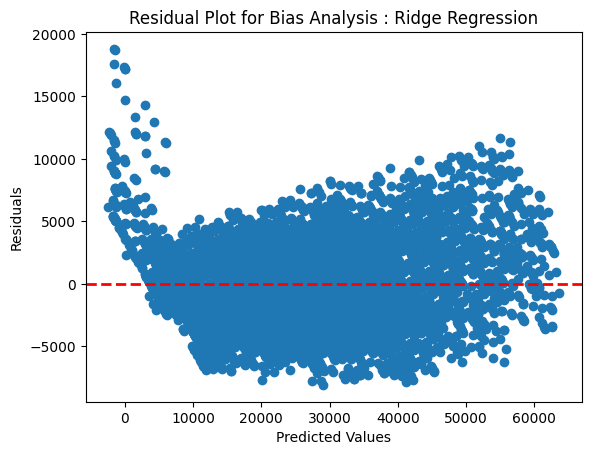

In [ ]:
# Get predicted values from the Ridge regression model
y_pred_ridgetest = grid_search_ridge.predict(X_test_ridge)
y_pred_ridgetrain = grid_search_ridge.predict(X_train_ridge)

# Evaluation metrics for Test Data

# Test Data Evaluation
print("\n---Test Data Evaluation---")

# RMSE (Root Mean Squared Error) - Test Data
rmse_test = np.sqrt(mean_squared_error(y_test_ridge, y_pred_ridgetest))
print(f'Test RMSE: {rmse_test:.2f}')

# MAPE (Mean Absolute Percentage Error) - Test Data
mape_test = mean_absolute_percentage_error(y_test_ridge, y_pred_ridgetest) * 100  # In percentage
print(f'Test MAPE: {mape_test:.2f}%')

# R-squared (Coefficient of Determination) - Test Data
r2_test = r2_score(y_test_ridge, y_pred_ridgetest)
print(f'Test R-squared: {r2_test:.4f}')

# Adjusted R-squared - Test Data
n_test = len(y_test_ridge)  # Number of observations in test data
p = X_test_ridge.shape[1]   # Number of predictors (features)
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p - 1))
print(f'Test Adjusted R-squared: {adjusted_r2_test:.4f}')

# Evaluation metrics for Train Data

# Test Data Evaluation
print("\n---Train Data Evaluation---")

# RMSE (Root Mean Squared Error) - Train Data
rmse_train = np.sqrt(mean_squared_error(y_train_ridge, y_pred_ridgetrain))
print(f'Train RMSE: {rmse_train:.2f}')

# MAPE (Mean Absolute Percentage Error) - Train Data
mape_train = mean_absolute_percentage_error(y_train_ridge, y_pred_ridgetrain) * 100  # In percentage
print(f'Train MAPE: {mape_train:.2f}%')

# R-squared (Coefficient of Determination) - Train Data
r2_train = r2_score(y_train_ridge, y_pred_ridgetrain)
print(f'Train R-squared: {r2_train:.4f}')

# Adjusted R-squared - Train Data
n_train = len(y_train_ridge)  # Number of observations in train data
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p - 1))
print(f'Train Adjusted R-squared: {adjusted_r2_train:.4f}')

# Residuals (Difference between actual and predicted values for test data)
residuals_test = y_test_ridge - y_pred_ridgetest

# Residual plot for bias analysis (for test data)
plt.scatter(y_pred_ridgetest, residuals_test)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Bias Analysis : Ridge Regression')
plt.show()


***Regularized LASSO model and the coefficients***

---



In [ ]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X, y, test_size=0.30, random_state=16)

In [ ]:
# Define the model
lasso = Lasso()

# Create a range of alpha values to test
param_grid_lasso = {'alpha': np.logspace(-4, 4, 100)}  # Testing values from 0.0001 to 10000

# Set up the grid search with cross-validation
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso,
                                  scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)

# Fit the model
grid_search_lasso.fit(X_train_lasso, y_train_lasso)

print ("Lasso model:", (grid_search_lasso.best_estimator_.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [   -0.          -198.75357208    -0.             0.
     0.            -0.            -0.         13798.88062293
   119.49949608    -0.             0.             0.
     0.            -0.            -0.             0.
     0.             0.             0.             0.
     0.             0.             0.           724.21573489
    -0.             0.            -0.             0.
     0.             0.            -0.        ]



Test Set Evaluation Metrics:
RMSE (Test): 3435.58
MAPE (Test): 15.12%
R-squared (Test): 0.9425
Adjusted R-squared (Test): 0.9422

Train Set Evaluation Metrics:
RMSE (Train): 3398.27
MAPE (Train): 15.42%
R-squared (Train): 0.9437
Adjusted R-squared (Train): 0.9436


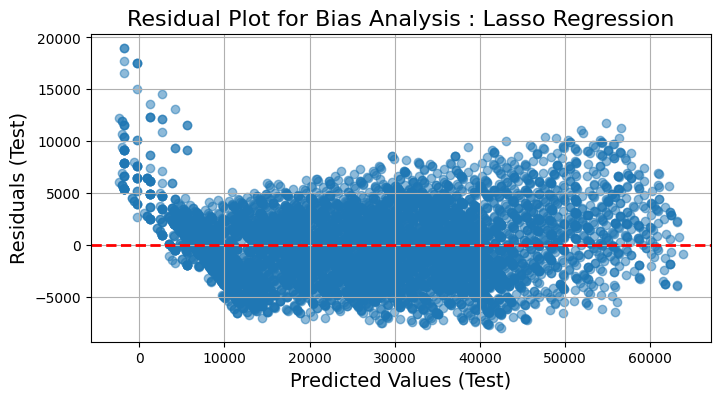

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Get predicted values from the Lasso model for both train and test sets
y_pred_lasso_test = grid_search_lasso.predict(X_test_lasso)
y_pred_lasso_train = grid_search_lasso.predict(X_train_lasso)

# Evaluation metrics for the Test Set
print("\nTest Set Evaluation Metrics:")
# 1. RMSE (Root Mean Squared Error) for test set
rmse_test = np.sqrt(mean_squared_error(y_test_lasso, y_pred_lasso_test))
print(f'RMSE (Test): {rmse_test:.2f}')

# 2. MAPE (Mean Absolute Percentage Error) for test set
mape_test = mean_absolute_percentage_error(y_test_lasso, y_pred_lasso_test) * 100  # In percentage
print(f'MAPE (Test): {mape_test:.2f}%')

# 3. R-squared (Coefficient of Determination) for test set
r2_test = r2_score(y_test_lasso, y_pred_lasso_test)
print(f'R-squared (Test): {r2_test:.4f}')

# 4. Adjusted R-squared for test set
n_test = len(y_test_lasso)  # Number of observations
p_test = X_test_lasso.shape[1]  # Number of predictors (features)
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))
print(f'Adjusted R-squared (Test): {adjusted_r2_test:.4f}')


# Evaluation metrics for the Train Set
print("\nTrain Set Evaluation Metrics:")
# 1. RMSE (Root Mean Squared Error) for train set
rmse_train = np.sqrt(mean_squared_error(y_train_lasso, y_pred_lasso_train))
print(f'RMSE (Train): {rmse_train:.2f}')

# 2. MAPE (Mean Absolute Percentage Error) for train set
mape_train = mean_absolute_percentage_error(y_train_lasso, y_pred_lasso_train) * 100  # In percentage
print(f'MAPE (Train): {mape_train:.2f}%')

# 3. R-squared (Coefficient of Determination) for train set
r2_train = r2_score(y_train_lasso, y_pred_lasso_train)
print(f'R-squared (Train): {r2_train:.4f}')

# 4. Adjusted R-squared for train set
n_train = len(y_train_lasso)  # Number of observations
p_train = X_train_lasso.shape[1]  # Number of predictors (features)
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))
print(f'Adjusted R-squared (Train): {adjusted_r2_train:.4f}')


# Residuals (Difference between actual and predicted values for test set)
residuals_test = y_test_lasso - y_pred_lasso_test

# Residual plot for bias analysis for test set
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_lasso_test, residuals_test, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (Test)', fontsize=14)
plt.ylabel('Residuals (Test)', fontsize=14)
plt.title('Residual Plot for Bias Analysis : Lasso Regression', fontsize=16)
plt.grid()
plt.show()

# Notes for analysis:
# Check for patterns in the residual plot.
# If a clear pattern (e.g., funnel shape or curvature) is observed,
# it may indicate model bias or that the model is not capturing


***Polynomial Regression***

---



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Create polynomial features (degree 2 as an example)
poly_features = PolynomialFeatures(degree = 2, interaction_only=True)

In [ ]:
X_poly = poly_features.fit_transform(X)
X_train_Poly, X_test_Poly, y_train_Poly, y_test_Poly = train_test_split(X_poly, y, test_size=0.30, random_state=16)
X_train_Poly.shape

(17500, 497)

***Fit a simple non regularized linear model on poly features***

---



---Train Data Evaluation---
Train RMSE: 3241.00
Train MAPE: 14.43%
Train R-squared: 0.9488
Train Adjusted R-squared: 0.9473

---Test Data Evaluation---
Test RMSE: 3366.02
Test MAPE: 14.64%
Test R-squared: 0.9448
Test Adjusted R-squared: 0.9408


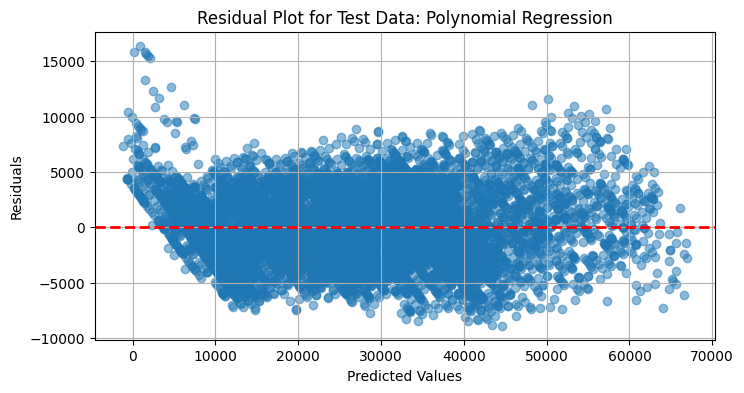

In [ ]:
# Fit a Linear Regression model to the polynomial features
model = LinearRegression()
model.fit(X_train_Poly, y_train_Poly)

# Get predicted values from the model
y_train_pred = model.predict(X_train_Poly)
y_test_pred = model.predict(X_test_Poly)

# Evaluation metrics for Train Data
print("---Train Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train_Poly, y_train_pred))
print(f'Train RMSE: {rmse_train:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_train = mean_absolute_percentage_error(y_train_Poly, y_train_pred) * 100  # In percentage
print(f'Train MAPE: {mape_train:.2f}%')

# R-squared (Coefficient of Determination)
r2_train = r2_score(y_train_Poly, y_train_pred)
print(f'Train R-squared: {r2_train:.4f}')

# Adjusted R-squared
n_train = len(y_train_Poly)  # Number of observations in train
p_train = X_train_Poly.shape[1]  # Number of predictors (features) in train
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))
print(f'Train Adjusted R-squared: {adjusted_r2_train:.4f}')

# Evaluation metrics for Test Data
print("\n---Test Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_test = np.sqrt(mean_squared_error(y_test_Poly, y_test_pred))
print(f'Test RMSE: {rmse_test:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_test = mean_absolute_percentage_error(y_test_Poly, y_test_pred) * 100  # In percentage
print(f'Test MAPE: {mape_test:.2f}%')

# R-squared (Coefficient of Determination)
r2_test = r2_score(y_test_Poly, y_test_pred)
print(f'Test R-squared: {r2_test:.4f}')

# Adjusted R-squared
n_test = len(y_test_Poly)  # Number of observations in test
p_test = X_test_Poly.shape[1]  # Number of predictors (features) in test
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))
print(f'Test Adjusted R-squared: {adjusted_r2_test:.4f}')

# Residuals (Difference between actual and predicted values) for Test Data
residuals_test = y_test_Poly - y_test_pred

# Residual plot for bias analysis (Test Data)
plt.figure(figsize=(8, 4))
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Test Data: Polynomial Regression')
plt.grid()
plt.show()

# You can check for patterns in the residual plot.
# If there is a clear pattern (e.g., funnel shape or curvature),
# it could indicate model bias or that the model is not capturing all the patterns in the data.


***RandomForestRegressor***

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Assuming X_scaled and y_scaled are your scaled features and target variable
X_train_gradiant, X_test_gradiant, y_train_gradiant, y_test_gradiant = train_test_split(X, y, test_size=0.30, random_state=16)


---Train Data Evaluation---
Train RMSE: 2514.84
Train MAPE: 10.16%
Train R-squared: 0.9692
Train Adjusted R-squared: 0.9691

---Test Data Evaluation---
Test RMSE: 3150.15
Test MAPE: 12.31%
Test R-squared: 0.9516
Test Adjusted R-squared: 0.9514


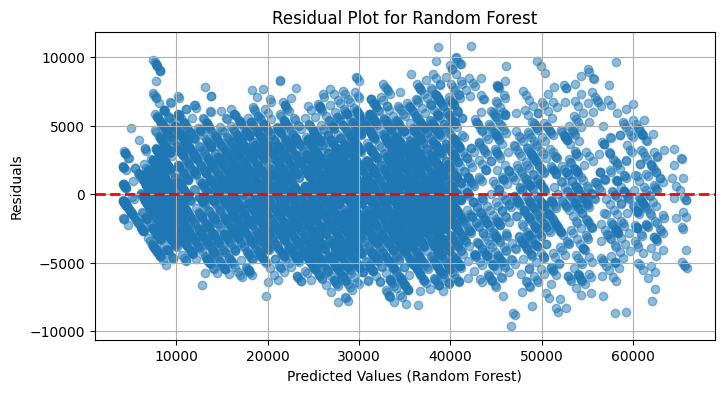

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_regressor = RandomForestRegressor(random_state=16)

param_grid_rfr = {
    'n_estimators': [100],  # The number of trees in the forest.
    'max_depth': [10],  #This limits the depth of the trees to prevent overfitting.
    'min_samples_split': [2],  #The minimum number of samples required to split an internal node.
    'min_samples_leaf': [1]  # The minimum number of samples that must be present at a leaf node.
}


grid_search_rfr = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rfr, scoring='neg_mean_squared_error', cv=5)
grid_search_rfr.fit(X_train_gradiant, y_train_gradiant)
rf_regressor = grid_search_rfr.best_estimator_


# Predict on the training set
y_train_pred_rf = rf_regressor.predict(X_train_gradiant)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test_gradiant)

# Evaluation metrics for Train Data
print("---Train Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_train_rf = np.sqrt(mean_squared_error(y_train_gradiant, y_train_pred_rf))
print(f'Train RMSE: {rmse_train_rf:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_train_rf = mean_absolute_percentage_error(y_train_gradiant, y_train_pred_rf) * 100
print(f'Train MAPE: {mape_train_rf:.2f}%')

# R-squared (Coefficient of Determination)
r2_train_rf = r2_score(y_train_gradiant, y_train_pred_rf)
print(f'Train R-squared: {r2_train_rf:.4f}')

# Adjusted R-squared
n_train_rf = len(y_train_gradiant)  # Number of observations in train
p_train_rf = X_train_gradiant.shape[1]  # Number of predictors (features) in train
adjusted_r2_train_rf = 1 - (1 - r2_train_rf) * ((n_train_rf - 1) / (n_train_rf - p_train_rf - 1))
print(f'Train Adjusted R-squared: {adjusted_r2_train_rf:.4f}')

# Evaluation metrics for Test Data
print("\n---Test Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_test_rf = np.sqrt(mean_squared_error(y_test_gradiant, y_pred_rf))
print(f'Test RMSE: {rmse_test_rf:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_test_rf = mean_absolute_percentage_error(y_test_gradiant, y_pred_rf) * 100
print(f'Test MAPE: {mape_test_rf:.2f}%')

# R-squared (Coefficient of Determination)
r2_test_rf = r2_score(y_test_gradiant, y_pred_rf)
print(f'Test R-squared: {r2_test_rf:.4f}')

# Adjusted R-squared
n_test_rf = len(y_test_gradiant)  # Number of observations in test
p_test_rf = X_test_gradiant.shape[1]  # Number of predictors (features) in test
adjusted_r2_test_rf = 1 - (1 - r2_test_rf) * ((n_test_rf - 1) / (n_test_rf - p_test_rf - 1))
print(f'Test Adjusted R-squared: {adjusted_r2_test_rf:.4f}')

# Residual Plot for Test Data
residuals_rf = y_test_gradiant - y_pred_rf
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (Random Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.grid()
plt.show()


In [ ]:
importances = rf_regressor.feature_importances_

# Create a DataFrame for feature importances
rf_feature_importances = pd.DataFrame({
    'Feature': X_train_gradiant.columns,
    'Importance': importances
})

# Calculate percentage
rf_feature_importances['Importance (%)'] = rf_feature_importances['Importance'] * 100

# Sort by importance
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
rf_feature_importances.head()

Random Forest Feature Importances:


,Feature,Importance,Importance (%)
7,Weight,0.98,98.11
23,Covered_by_any_other_company_Y,0.00,0.23
5,Avg_glucose_level,0.00,0.23
6,Bmi,0.00,0.23
3,Daily_avg_steps,0.00,0.22


***XGBoost Regressor***

---



---Train Data Evaluation---
Train RMSE: 3007.07
Train MAPE: 12.12%
Train R-squared: 0.9559
Train Adjusted R-squared: 0.9558

---Test Data Evaluation---
Test RMSE: 3106.46
Test MAPE: 12.30%
Test R-squared: 0.9529
Test Adjusted R-squared: 0.9528


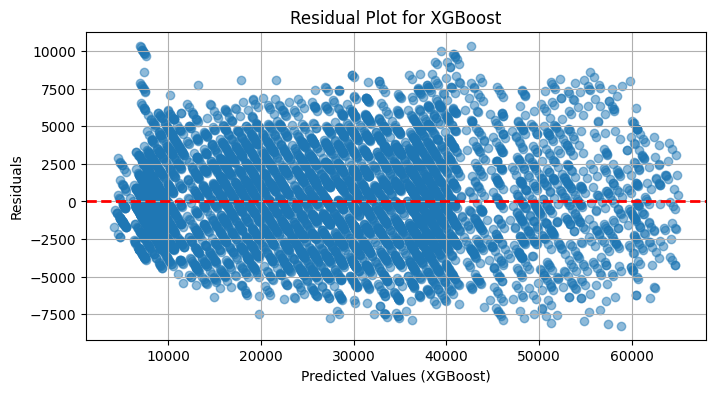

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Assuming X and y are your features and target variable
X_train_xboost, X_test_xboost, y_train_xboost, y_test_xboost = train_test_split(X, y, test_size=0.30, random_state=16)


# Initialize the model
xgb_regressor = XGBRegressor(n_estimators=100, random_state=16) #This is the number of boosting rounds or trees that the model will create sequentially.
param_grid = {
    'max_depth': [3, 4],  #This controls the maximum depth of each tree in the mode
    'min_child_weight': [1], #This specifies the minimum sum of instance weights (Hessian) needed in a child node.
    'subsample': [0.8], #This is the fraction of the training data that is randomly selected to grow trees.
    'colsample_bytree': [0.8], #This is the fraction of features (columns) to be randomly selected for each tree
    'learning_rate': [0.1] #allowing for more accurate models by building more trees. The learning rate shrinks the contribution of each tree.
}

grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_xboost, y_train_xboost)
xgb_regressor = grid_search.best_estimator_


# Predict on the training set
y_train_pred_xgb = xgb_regressor.predict(X_train_xboost)

# Predict on the test set
y_pred_xgb = xgb_regressor.predict(X_test_xboost)

# Evaluation metrics for Train Data
print("---Train Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train_xboost, y_train_pred_xgb))
print(f'Train RMSE: {rmse_train_xgb:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_train_xgb = mean_absolute_percentage_error(y_train_xboost, y_train_pred_xgb) * 100
print(f'Train MAPE: {mape_train_xgb:.2f}%')

# R-squared (Coefficient of Determination)
r2_train_xgb = r2_score(y_train_xboost, y_train_pred_xgb)
print(f'Train R-squared: {r2_train_xgb:.4f}')

# Adjusted R-squared
n_train_xgb = len(y_train_xboost)  # Number of observations in train
p_train_xgb = X_train_xboost.shape[1]  # Number of predictors (features) in train
adjusted_r2_train_xgb = 1 - (1 - r2_train_xgb) * ((n_train_xgb - 1) / (n_train_xgb - p_train_xgb - 1))
print(f'Train Adjusted R-squared: {adjusted_r2_train_xgb:.4f}')

# Evaluation metrics for Test Data
print("\n---Test Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test_xboost, y_pred_xgb))
print(f'Test RMSE: {rmse_test_xgb:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_test_xgb = mean_absolute_percentage_error(y_test_xboost, y_pred_xgb) * 100
print(f'Test MAPE: {mape_test_xgb:.2f}%')

# R-squared (Coefficient of Determination)
r2_test_xgb = r2_score(y_test_xboost, y_pred_xgb)
print(f'Test R-squared: {r2_test_xgb:.4f}')

# Adjusted R-squared
n_test_xgb = len(y_test_xboost)  # Number of observations in test
p_test_xgb = X_test_xboost.shape[1]  # Number of predictors (features) in test
adjusted_r2_test_xgb = 1 - (1 - r2_test_xgb) * ((n_test_xgb - 1) / (n_test_xgb - p_test_xgb - 1))
print(f'Test Adjusted R-squared: {adjusted_r2_test_xgb:.4f}')

# Residual Plot for Test Data
residuals_xgb = y_test_xboost - y_pred_xgb
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (XGBoost)')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBoost')
plt.grid()
plt.show()


In [ ]:
# Get feature importances
xgb_importances = xgb_regressor.feature_importances_

# Create a DataFrame for feature importances
xgb_feature_importances = pd.DataFrame({
    'Feature': X_train_xboost.columns,
    'Importance': xgb_importances
})

# Calculate percentage
xgb_feature_importances['Importance (%)'] = xgb_feature_importances['Importance'] * 100

# Sort by importance
xgb_feature_importances = xgb_feature_importances.sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importances:")
xgb_feature_importances.head(5)


XGBoost Feature Importances:


,Feature,Importance,Importance (%)
7,Weight,0.78,77.63
8,Weight_change_in_last_one_year,0.12,12.26
10,Adventure_sports_1,0.05,4.74
23,Covered_by_any_other_company_Y,0.02,1.74
1,Regular_checkup_last_year,0.02,1.54


Index(['Years_of_insurance_with_us', 'Regular_checkup_last_year',
       'Adventure_sports', 'Occupation', 'Visited_doctor_last_1_year',
       'Cholesterol_level', 'Daily_avg_steps', 'Age', 'Heart_decs_history',
       'Other_major_decs_history', 'Gender', 'Avg_glucose_level', 'Bmi',
       'Smoking_status', 'Weight', 'Covered_by_any_other_company', 'Alcohol',
       'Exercise', 'Weight_change_in_last_one_year', 'Fat_percentage',
       'Insurance_cost', 'Region', 'Cholesterol_level_num', 'Cluster'],
      dtype='object')


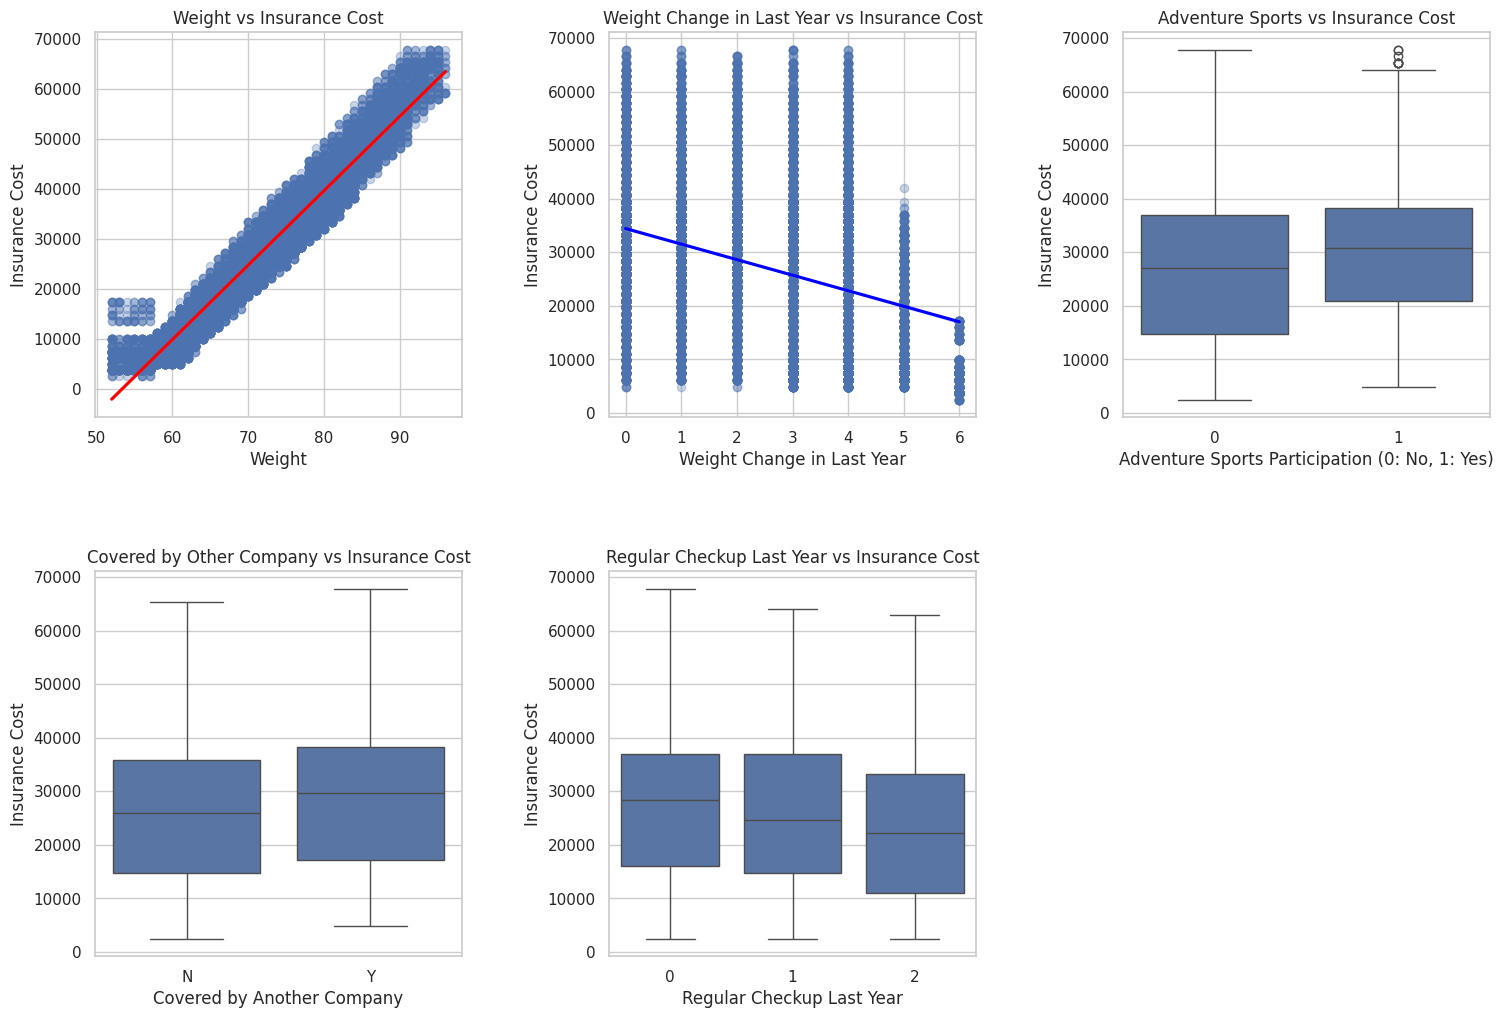

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Check your DataFrame columns
print(df.columns)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# 1. Weight vs. Insurance_cost
sns.regplot(x='Weight', y='Insurance_cost', data=df, ax=axes[0, 0], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[0, 0].set_title('Weight vs Insurance Cost')
axes[0, 0].set_xlabel('Weight')
axes[0, 0].set_ylabel('Insurance Cost')

# 2. Weight_change_in_last_one_year vs. Insurance_cost
sns.regplot(x='Weight_change_in_last_one_year', y='Insurance_cost', data=df, ax=axes[0, 1], scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
axes[0, 1].set_title('Weight Change in Last Year vs Insurance Cost')
axes[0, 1].set_xlabel('Weight Change in Last Year')
axes[0, 1].set_ylabel('Insurance Cost')

# 3. Adventure_sports vs. Insurance_cost
# Check if the column is represented as 'Adventure_sports' or another name.
sns.boxplot(x='Adventure_sports', y='Insurance_cost', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Adventure Sports vs Insurance Cost')
axes[0, 2].set_xlabel('Adventure Sports Participation (0: No, 1: Yes)')
axes[0, 2].set_ylabel('Insurance Cost')

# 4. Covered_by_any_other_company vs. Insurance_cost
# Update the name based on the DataFrame structure
sns.boxplot(x='Covered_by_any_other_company', y='Insurance_cost', data=df, ax=axes[1, 0])  # Check the exact name
axes[1, 0].set_title('Covered by Other Company vs Insurance Cost')
axes[1, 0].set_xlabel('Covered by Another Company')
axes[1, 0].set_ylabel('Insurance Cost')

# 5. Regular_checkup_last_year vs. Insurance_cost
sns.boxplot(x='Regular_checkup_last_year', y='Insurance_cost', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Regular Checkup Last Year vs Insurance Cost')
axes[1, 1].set_xlabel('Regular Checkup Last Year')
axes[1, 1].set_ylabel('Insurance Cost')

# Hide the empty subplot (2, 3)
axes[1, 2].axis('off')

# Show the plots
plt.show()


***ada Boost***

---



---Train Data Evaluation---
Train RMSE: 3214.34
Train MAPE: 14.32%
Train R-squared: 0.9496
Train Adjusted R-squared: 0.9496

---Test Data Evaluation---
Test RMSE: 3270.38
Test MAPE: 13.99%
Test R-squared: 0.9479
Test Adjusted R-squared: 0.9476


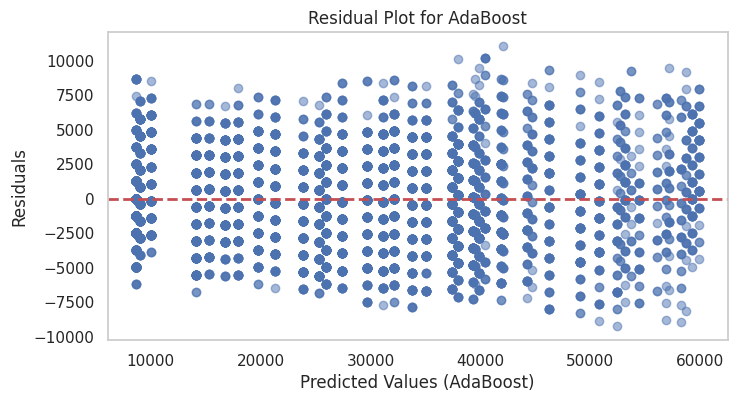

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

# Assuming X_scaled and y_scaled are your scaled features and target variable
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X, y, test_size=0.30, random_state=16)


ada_regressor = AdaBoostRegressor(random_state=16)
param_grid_ada = {
    'n_estimators': [50, 100, 200], # The number of weak learners (decision trees) to be trained sequentially.
    'learning_rate': [0.01, 0.1, 1.0] #The learning rate scales the contribution of each weak learner.
}

grid_search_ada = GridSearchCV(estimator=ada_regressor, param_grid=param_grid_ada, scoring='neg_mean_squared_error', cv=5)
grid_search_ada.fit(X_train_ada, y_train_ada)
ada_regressor = grid_search_ada.best_estimator_



# Initialize the model


# Train the model
ada_regressor.fit(X_train_ada, y_train_ada)

# Predict on the training set
y_train_pred_ada = ada_regressor.predict(X_train_ada)

# Predict on the test set
y_pred_ada = ada_regressor.predict(X_test_ada)

# Evaluation metrics for Train Data
print("---Train Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_train_ada = np.sqrt(mean_squared_error(y_train_ada, y_train_pred_ada))
print(f'Train RMSE: {rmse_train_ada:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_train_ada = mean_absolute_percentage_error(y_train_ada, y_train_pred_ada) * 100
print(f'Train MAPE: {mape_train_ada:.2f}%')

# R-squared (Coefficient of Determination)
r2_train_ada = r2_score(y_train_ada, y_train_pred_ada)
print(f'Train R-squared: {r2_train_ada:.4f}')

# Adjusted R-squared
n_train_ada = len(y_train_ada)  # Number of observations in train
p_train_ada = X_train_ada.shape[1]  # Number of predictors (features) in train
adjusted_r2_train_ada = 1 - (1 - r2_train_ada) * ((n_train_ada - 1) / (n_train_ada - p_train_ada - 1))
print(f'Train Adjusted R-squared: {adjusted_r2_train_ada:.4f}')

# Evaluation metrics for Test Data
print("\n---Test Data Evaluation---")

# RMSE (Root Mean Squared Error)
rmse_test_ada = np.sqrt(mean_squared_error(y_test_ada, y_pred_ada))
print(f'Test RMSE: {rmse_test_ada:.2f}')

# MAPE (Mean Absolute Percentage Error)
mape_test_ada = mean_absolute_percentage_error(y_test_ada, y_pred_ada) * 100
print(f'Test MAPE: {mape_test_ada:.2f}%')

# R-squared (Coefficient of Determination)
r2_test_ada = r2_score(y_test_ada, y_pred_ada)
print(f'Test R-squared: {r2_test_ada:.4f}')

# Adjusted R-squared
n_test_ada = len(y_test_ada)  # Number of observations in test
p_test_ada = X_test_ada.shape[1]  # Number of predictors (features) in test
adjusted_r2_test_ada = 1 - (1 - r2_test_ada) * ((n_test_ada - 1) / (n_test_ada - p_test_ada - 1))
print(f'Test Adjusted R-squared: {adjusted_r2_test_ada:.4f}')

# Residual Plot for Test Data
residuals_ada = y_test_ada - y_pred_ada
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_ada, residuals_ada, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (AdaBoost)')
plt.ylabel('Residuals')
plt.title('Residual Plot for AdaBoost')
plt.grid()
plt.show()


In [ ]:
# Get feature importances from the base estimator
ada_importances = ada_regressor.estimators_[0].feature_importances_

# Create a DataFrame for feature importances
ada_feature_importances = pd.DataFrame({
    'Feature': X_train_ada.columns,
    'Importance': ada_importances
})

# Calculate percentage
ada_feature_importances['Importance (%)'] = ada_feature_importances['Importance'] * 100

# Sort by importance
ada_feature_importances = ada_feature_importances.sort_values(by='Importance', ascending=False)

print("\nAdaBoost Feature Importances:")
ada_feature_importances.head()


AdaBoost Feature Importances:


,Feature,Importance,Importance (%)
7,Weight,1.00,100.00
0,Years_of_insurance_with_us,0.00,0.00
16,Cholesterol_level_225 to 250,0.00,0.00
29,Region_Southeast,0.00,0.00
28,Region_Northwest,0.00,0.00


***Support Vector Regressor (SVR)***

---



Best SVR Model: {'C': 10, 'epsilon': 1, 'kernel': 'linear'}, Cross-Validated MAPE: 0.15%
Training MAPE: 15.36%
Training RMSE: 3426.61
Training R-squared: 0.9428
Training Adjusted R-squared: 0.9427
Test MAPE: 15.16%
Test RMSE: 3476.00
Test R-squared: 0.9411
Test Adjusted R-squared: 0.9408


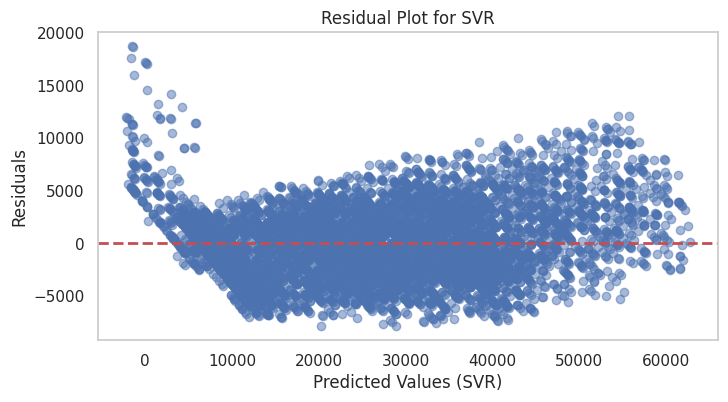

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Train-test split (using scaled features)
X = X_transformed_df  # Your scaled and encoded features
y = df['Insurance_cost']  # Target variable

# Split the data into training and testing sets
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X, y, test_size=0.30, random_state=16)

# Standardize the features
scaler = StandardScaler()
X_train_svr = scaler.fit_transform(X_train_svr)
X_test_svr = scaler.transform(X_test_svr)

# Define the expanded hyperparameter grid
param_grid = {
    'C': [10], #Similar to Alpha values, how much to regularize
    'epsilon': [1], #How much error or deviation is allowed without penalty.
    'kernel': ['linear'],
}

# Initialize the SVR model
svr = SVR()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)

# **Training Step**
grid_search.fit(X_train_svr, y_train_svr)  # Fit the model on the training data

# Get the best model
best_svr = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negative because we used neg_mean_absolute_percentage_error

# Display the best parameters and score
print(f"Best SVR Model: {best_params}, Cross-Validated MAPE: {best_score:.2f}%")

# Evaluate the best model on the training set
y_train_pred_svr = best_svr.predict(X_train_svr)

# Calculate metrics for training data
mape_train_svr = mean_absolute_percentage_error(y_train_svr, y_train_pred_svr) * 100
rmse_train_svr = np.sqrt(mean_squared_error(y_train_svr, y_train_pred_svr))
r2_train_svr = r2_score(y_train_svr, y_train_pred_svr)

# Calculate Adjusted R-squared for training data
n_train = len(y_train_svr)  # Number of training samples
p_train = X_train_svr.shape[1]  # Number of features

def adjusted_r2(r2, n, p):
    """Calculate Adjusted R-squared."""
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

adj_r2_train = adjusted_r2(r2_train_svr, n_train, p_train)

print(f'Training MAPE: {mape_train_svr:.2f}%')
print(f'Training RMSE: {rmse_train_svr:.2f}')
print(f'Training R-squared: {r2_train_svr:.4f}')
print(f'Training Adjusted R-squared: {adj_r2_train:.4f}')

# Evaluate the best model on the test set
y_test_pred_svr = best_svr.predict(X_test_svr)

# Calculate metrics for test data
mape_test_svr = mean_absolute_percentage_error(y_test_svr, y_test_pred_svr) * 100
rmse_test_svr = np.sqrt(mean_squared_error(y_test_svr, y_test_pred_svr))
r2_test_svr = r2_score(y_test_svr, y_test_pred_svr)

# Calculate Adjusted R-squared for test data
n_test = len(y_test_svr)  # Number of test samples
p_test = X_test_svr.shape[1]  # Number of features

adj_r2_test = adjusted_r2(r2_test_svr, n_test, p_test)

print(f'Test MAPE: {mape_test_svr:.2f}%')
print(f'Test RMSE: {rmse_test_svr:.2f}')
print(f'Test R-squared: {r2_test_svr:.4f}')
print(f'Test Adjusted R-squared: {adj_r2_test:.4f}')

# Residual Plot for Test Data
residuals_svr = y_test_svr - y_test_pred_svr
plt.figure(figsize=(8, 4))
plt.scatter(y_test_pred_svr, residuals_svr, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (SVR)')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR')
plt.grid()
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Calculate permutation importance on the SVR model
svr_importances = permutation_importance(best_svr, X_test_svr, y_test_svr, n_repeats=30, random_state=42, scoring='neg_mean_absolute_percentage_error')

# Create a DataFrame for feature importances
svr_feature_importances = pd.DataFrame({
    'Feature': X.columns,  # Original feature names
    'Importance': svr_importances.importances_mean
})

# Sort by importance
svr_feature_importances = svr_feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 5 features
print("Top 5 Important Features for SVR:")
print(svr_feature_importances.head(5))


Top 5 Important Features for SVR:
                           Feature  Importance
7                           Weight        0.79
23  Covered_by_any_other_company_Y        0.00
1        Regular_checkup_last_year        0.00
16    Cholesterol_level_225 to 250        0.00
4                              Age        0.00
